# Output analysis

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from model.model_nile import ModelNile
from experimentation.data_generation import generate_input_data
from plotter import HydroModelPlotter

In [3]:
# nile_model = ModelNile()
# model_object = generate_input_data(nile_model, sim_horizon=20)

Read the results of the optimization:

In [4]:
opt_results = pd.read_csv("../outputs/baseline_results.csv").drop(columns= "Unnamed: 0")
opt_results

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v160,v161,v162,v163,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro
0,0.031625,0.181810,0.997529,0.309545,0.792908,0.558124,0.185522,0.581572,0.653132,0.680084,...,0.258974,0.414938,0.845245,0.070192,32860.160621,532.574401,0.000000,42.930183,0.0,6.200764e+07
1,0.056201,0.713527,0.763359,0.865425,0.939490,0.995084,0.391960,0.799009,0.764611,0.100038,...,0.016836,0.343680,0.792727,0.212921,34722.987677,734.532301,0.562500,42.930183,0.0,6.227318e+07
2,0.020335,0.193194,0.184577,0.622718,0.101891,0.536598,0.494952,0.652872,0.597091,0.957275,...,0.630611,0.571315,0.828039,0.399100,31422.095961,652.042734,0.562500,43.255449,0.0,5.495098e+07
3,0.831486,0.793253,0.987696,0.306151,0.954972,0.794132,0.415361,0.403844,0.042967,0.780452,...,0.609311,0.833445,0.595390,0.595109,7609.454234,62.200044,0.000000,92.657943,0.0,1.255121e+05
4,0.000115,0.337710,0.980507,0.354126,0.774983,0.554867,0.200878,0.588770,0.676369,0.692490,...,0.044174,0.572185,0.240098,0.401478,18689.382578,340.888240,0.095833,0.033902,0.0,5.302814e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.012456,0.553450,0.395182,0.327546,0.225649,0.536598,0.511642,0.557706,0.905832,0.982441,...,0.637327,0.537654,0.843920,0.040168,18141.428488,307.088646,0.162500,0.000000,0.0,5.304743e+07
118,0.000115,0.849048,0.160053,0.315012,0.995780,0.719914,0.496777,0.165382,0.884575,0.801340,...,0.911342,0.575562,0.670057,0.110831,17270.116463,241.682454,0.000000,0.000000,0.0,5.268096e+07
119,0.000007,0.321933,0.429795,0.349747,0.956639,0.430595,0.439182,0.082064,0.796610,0.638064,...,0.541427,0.616892,0.708624,0.047388,19805.577704,334.260212,0.016667,0.005124,0.0,5.303458e+07
120,0.000012,0.194976,0.920689,0.348590,0.958199,0.438387,0.393838,0.220041,0.818565,0.638731,...,0.632377,0.573156,0.679720,0.131060,20382.644973,353.531612,0.000000,0.006364,0.0,5.303422e+07


Let's kick out the Sudan 90th percentile worst month objective (fifth objective) as it is always zero:

In [5]:
opt_results = opt_results.drop(columns="sudan_90")

In [6]:
best_obj_indices = dict()
directions = ["min", "min", "min", "min", "max"]

for i, obj in enumerate(opt_results.columns[-5:]):
    if directions[i] == "min":
        indexes = opt_results.loc[opt_results[obj] == opt_results[obj].min(),:].index
    elif directions[i] == "max":
        indexes = opt_results.loc[opt_results[obj] == opt_results[obj].max(),:].index
    else: print("issue with directions!")
        
    best_obj_indices[obj] = indexes

In [7]:
best_obj_indices

{'egypt_irr': Int64Index([3], dtype='int64'),
 'egypt_90': Int64Index([93], dtype='int64'),
 'egypt_low_had': Int64Index([0, 3, 5, 15, 41, 52, 60, 74, 79, 91, 95, 97, 105, 106, 118, 120], dtype='int64'),
 'sudan_irr': Int64Index([  5,   7,   8,   9,  13,  14,  15,  16,  17,  19,  21,  24,  25,
              26,  29,  33,  34,  35,  36,  37,  41,  42,  43,  44,  45,  47,
              48,  49,  51,  57,  58,  59,  60,  61,  62,  66,  68,  70,  71,
              72,  73,  74,  75,  76,  79,  80,  81,  84,  87,  88,  90,  91,
              92,  93,  96,  97,  99, 100, 104, 106, 107, 109, 112, 117, 118,
             121],
            dtype='int64'),
 'ethiopia_hydro': Int64Index([1], dtype='int64')}

In [8]:
best_indices_judgement_reduced = {'egypt_irr': 3,
 'egypt_90':93,
 'egypt_low_had': [0, 3, 5, 15, 41, 52, 60, 74, 79, 91, 95, 97, 105, 106, 118, 120],
 'sudan_irr':[  5,   7,   8,   9,  13,  14,  15,  16,  17,  19,  21,  24,  25,
              26,  29,  33,  34,  35,  36,  37,  41,  42,  43,  44,  45,  47,
              48,  49,  51,  57,  58,  59,  60,  61,  62,  66,  68,  70,  71,
              72,  73,  74,  75,  76,  79,  80,  81,  84,  87,  88,  90,  91,
              92,  93,  96,  97,  99, 100, 104, 106, 107, 109, 112, 117, 118,
             121],
 'ethiopia_hydro':1}

In [9]:
policies, objectives = opt_results.iloc[:, :-5], opt_results.iloc[:, -5:]

In [10]:
objectives

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,ethiopia_hydro
0,32860.160621,532.574401,0.000000,42.930183,6.200764e+07
1,34722.987677,734.532301,0.562500,42.930183,6.227318e+07
2,31422.095961,652.042734,0.562500,43.255449,5.495098e+07
3,7609.454234,62.200044,0.000000,92.657943,1.255121e+05
4,18689.382578,340.888240,0.095833,0.033902,5.302814e+07
...,...,...,...,...,...
117,18141.428488,307.088646,0.162500,0.000000,5.304743e+07
118,17270.116463,241.682454,0.000000,0.000000,5.268096e+07
119,19805.577704,334.260212,0.016667,0.005124,5.303458e+07
120,20382.644973,353.531612,0.000000,0.006364,5.303422e+07


In [11]:
objectives.loc[93]

egypt_irr         9.791788e+03
egypt_90          7.984833e+00
egypt_low_had     1.250000e-02
sudan_irr         0.000000e+00
ethiopia_hydro    4.549939e+07
Name: 93, dtype: float64

In [12]:
best_egypt_irr_and_HAD = policies.loc[0] #3

In [13]:
nile_model = ModelNile()
model_object = generate_input_data(nile_model, sim_horizon=20)
for _ in range(2):
    print(nile_model.evaluate(best_egypt_irr_and_HAD))

(32860.159657138276, 532.5744045433462, 0.0, 42.93018260567419, 0.0, 62007634.8894943)
(32779.00986985567, 530.8883638922193, 0.0, 0.0, 0.0, 52558433.70453799)


In [14]:
best_egypt_irr_and_HAD = policies.loc[1]
nile_model = ModelNile()
model_object = generate_input_data(nile_model, sim_horizon=20)
for _ in range(2):
    print(nile_model.evaluate(best_egypt_irr_and_HAD))

(34722.98767698067, 734.532300865978, 0.5625, 42.9301825962105, 0.0, 62273176.16284869)
(28550.162718478197, 470.40850578670506, 0.6041666666666666, 0.0, 0.0, 52763476.036470436)


In [15]:
best_egypt_irr_and_HAD = policies.loc[2]
nile_model = ModelNile()
model_object = generate_input_data(nile_model, sim_horizon=20)
for _ in range(2):
    print(nile_model.evaluate(best_egypt_irr_and_HAD))

(31422.092639231207, 652.0427346096458, 0.5625, 43.25544881425549, 0.0, 54950971.86829668)
(23996.729043312964, 394.92121780821617, 0.6375, 0.0, 0.0, 39127564.156439774)


In [16]:
best_egypt_irr_and_HAD = policies.loc[3]
nile_model = ModelNile()
model_object = generate_input_data(nile_model, sim_horizon=20)
for _ in range(2):
    print(nile_model.evaluate(best_egypt_irr_and_HAD))

(35065.93390301643, 632.2208749405013, 0.0, 135.10676660412804, 0.0, 7431059.674577347)
(35325.53076313783, 632.2247749276289, 0.0, 92.65794182554791, 0.0, 125512.14400044373)


In [17]:
best_egypt_irr_and_HAD = policies.loc[121]
nile_model = ModelNile()
model_object = generate_input_data(nile_model, sim_horizon=20)
for _ in range(2):
    print(nile_model.evaluate(best_egypt_irr_and_HAD))

(29488.644058659862, 567.1307060167946, 0.06666666666666667, 42.930182549123856, 0.0, 62365753.87321823)
(27957.877385489424, 508.62996339880146, 0.0, 2.3013102588580683, 0.0, 53021841.214322984)


In [13]:
best_egypt_90 = policies.loc[93]

In [14]:
best_ethiopia_hydro = policies.loc[1]

In [15]:
nile_model = ModelNile()
nile_model = generate_input_data(nile_model, sim_horizon=20)
nile_model.evaluate(best_egypt_irr_and_HAD)

(35065.93390301643,
 632.2208749405013,
 0.0,
 135.10676660412804,
 0.0,
 7431059.674577347)

In [16]:
nile_model = ModelNile()
nile_model = generate_input_data(nile_model, sim_horizon=20)
nile_model.evaluate(best_egypt_90)

(37006.372604211574,
 624.9505208214059,
 0.0,
 42.93018268049104,
 0.0,
 62225937.150359385)

Before redoing the simulation with found policies, let's do some objectives visualization:

### Parallel Coordinates Plot

In [15]:
def normalize_objs(df, directions):
    desirability_couples = list()
    working_df = df.copy()
    for i, col in enumerate(df.columns):
        if directions[i] == "min": best, worst = df[col].min(), df[col].max()
        elif directions[i] == "max": best, worst = df[col].max(), df[col].min()
        desirability_couples.append((worst, best))
        working_df[col] = (df[col] - worst) / (best - worst)
        
    return working_df, desirability_couples

Objective values are normalised such that the most desirable value becomes 1 whilst the least desirable becomes 0.

In [16]:
norm_df, desire_couples = normalize_objs(
    objectives, ["min", "min", "min", "min", "max"]
)

In [17]:
norm_df["class"] = "solutions"
norm_df.at[1,"class"] = "Best GERD Hydro"
norm_df.at[93,"class"] = "Best Egypt 90th Percentile"
norm_df.at[3,"class"] = "Best Egypt Irrigation and HAD"

In [31]:
fig, ax = plt.subplots()
parallel_coordinates(norm_df, "class", ax=ax, color=["gray",
    "red",
    "blue",
    "purple"])
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

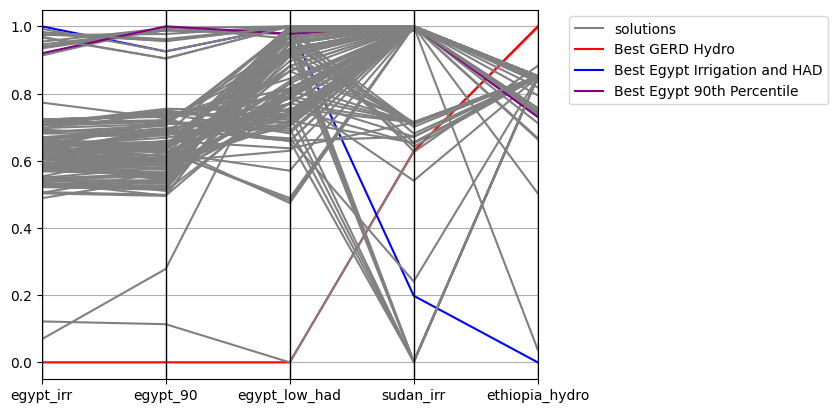

In [32]:
plt.show()

In [35]:
def find_compromise_solutions(objectives_norm_df, percentile):
    index_lists = []
    for col in objectives_norm_df.columns:
        threshold = np.percentile(objectives_norm_df[col], percentile)
        index_lists.append(objectives_norm_df.loc[objectives_norm_df[col] >= threshold, :].index)
        
    common_indices = []
    for i in objectives_norm_df.index:
        counter = 0
        for check_list in index_lists:
            if i not in check_list: break
            counter += 1
        if counter == len(index_lists):
            common_indices.append(i)
        
    return common_indices
    

In [59]:
find_compromise_solutions(norm_df.iloc[:,:-1], 30)

[87]

In [42]:
compromise_30_percent = policies.loc[87]

In [43]:
norm_df.at[87,"class"] = "Compromise Solution"

In [55]:
fig, ax = plt.subplots()
parallel_coordinates(norm_df.loc[[1,3, 87, 93],:], "class", ax=ax, color=[
    "red",
    "blue",
    "green",
    "purple"])
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

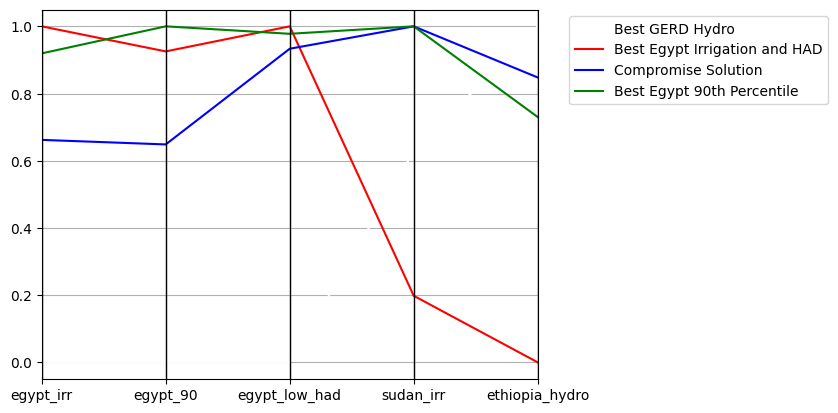

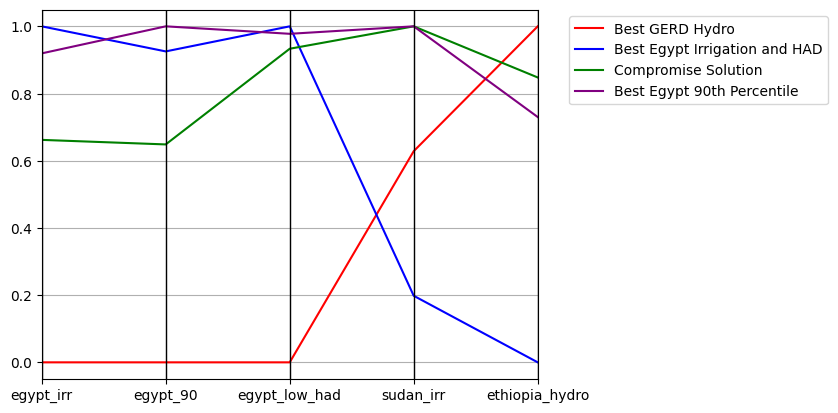

In [56]:
plt.show()

In [48]:
objectives.loc[3]

egypt_irr           7609.454234
egypt_90              62.200044
egypt_low_had          0.000000
sudan_irr             92.657943
ethiopia_hydro    125512.144000
Name: 3, dtype: float64

In [49]:
objectives.loc[93]

egypt_irr         9.791788e+03
egypt_90          7.984833e+00
egypt_low_had     1.250000e-02
sudan_irr         0.000000e+00
ethiopia_hydro    4.549939e+07
Name: 93, dtype: float64

In [50]:
objectives.loc[1]

egypt_irr         3.472299e+04
egypt_90          7.345323e+02
egypt_low_had     5.625000e-01
sudan_irr         4.293018e+01
ethiopia_hydro    6.227318e+07
Name: 1, dtype: float64

In [51]:
objectives.loc[87]

egypt_irr         1.677156e+04
egypt_90          2.633361e+02
egypt_low_had     3.750000e-02
sudan_irr         0.000000e+00
ethiopia_hydro    5.281635e+07
Name: 87, dtype: float64

In [66]:
norm_df.iloc[:,:-1]

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,ethiopia_hydro
0,0.068705,0.277969,1.000000,0.628457,0.995727
1,-0.000000,-0.000000,-0.000000,0.628457,1.000000
2,0.121743,0.113536,-0.000000,0.625642,0.882181
3,1.000000,0.925380,1.000000,0.198085,0.000000
4,0.591351,0.541801,0.829630,0.999707,0.851241
...,...,...,...,...,...
117,0.611560,0.588322,0.711111,1.000000,0.851551
118,0.643696,0.678345,1.000000,1.000000,0.845654
119,0.550183,0.550924,0.970370,0.999956,0.851344
120,0.528900,0.524399,1.000000,0.999945,0.851339


In [67]:
sns.pairplot(norm_df.iloc[:,:-1])

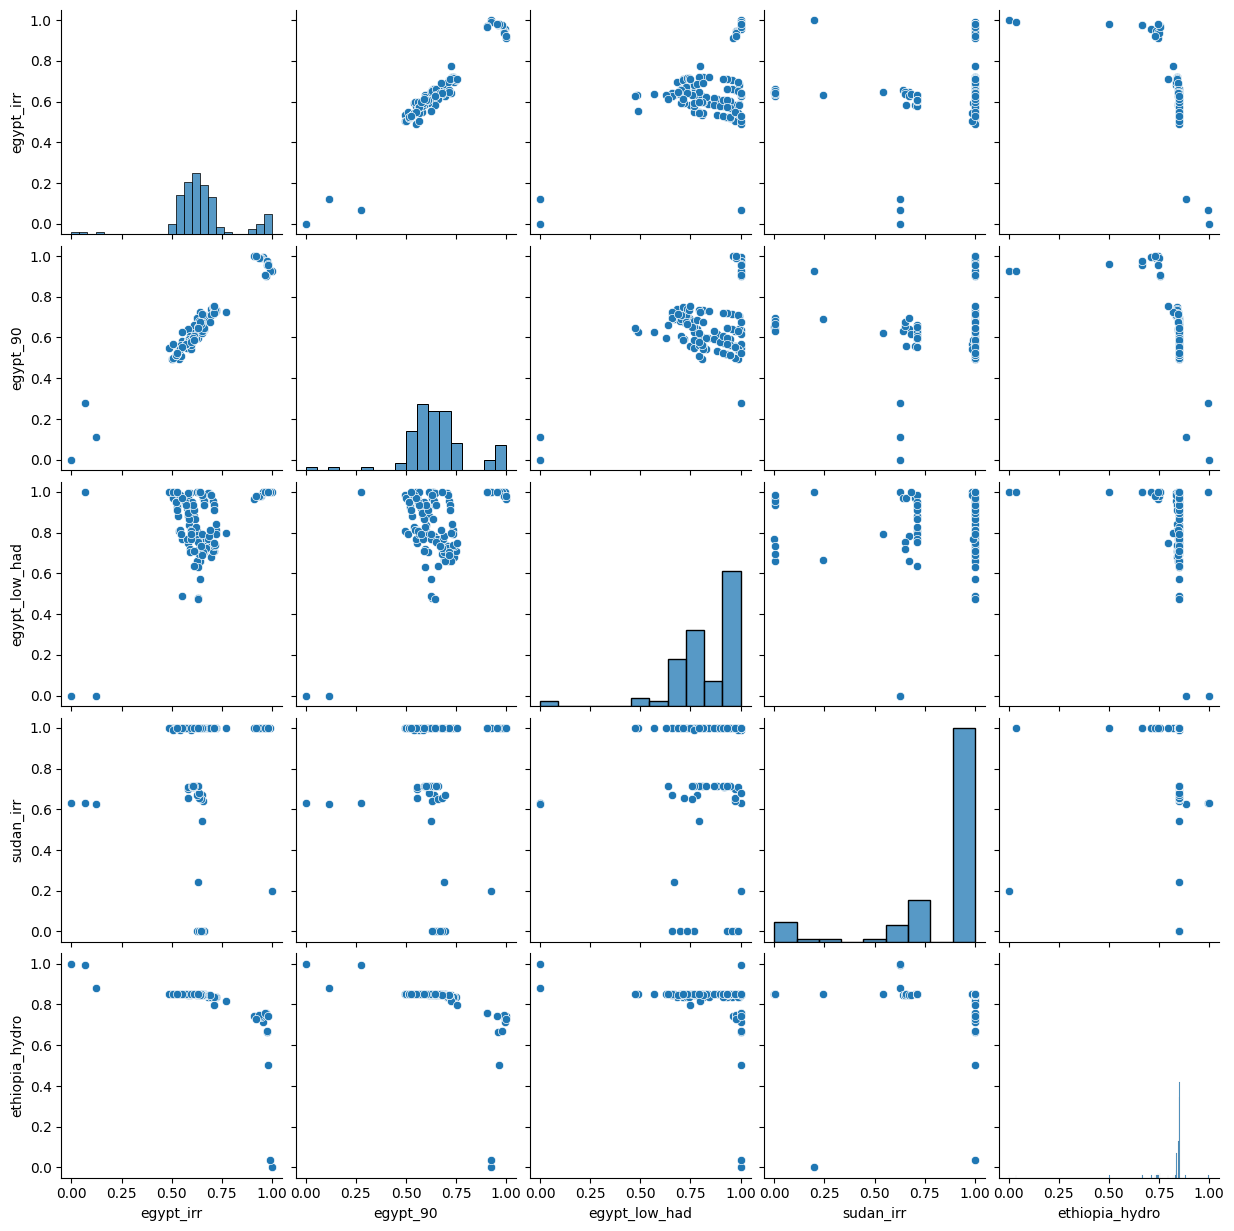

In [68]:
plt.show()

In [75]:
test_policies = [best_egypt_irr_and_HAD, best_egypt_90, best_ethiopia_hydro, compromise_30_percent]
policy_names = ["Best Egypt Irrigation and HAD", "Best Egypt 90th", "Best Ethiopia Hydropower", "Compromise Solution"]

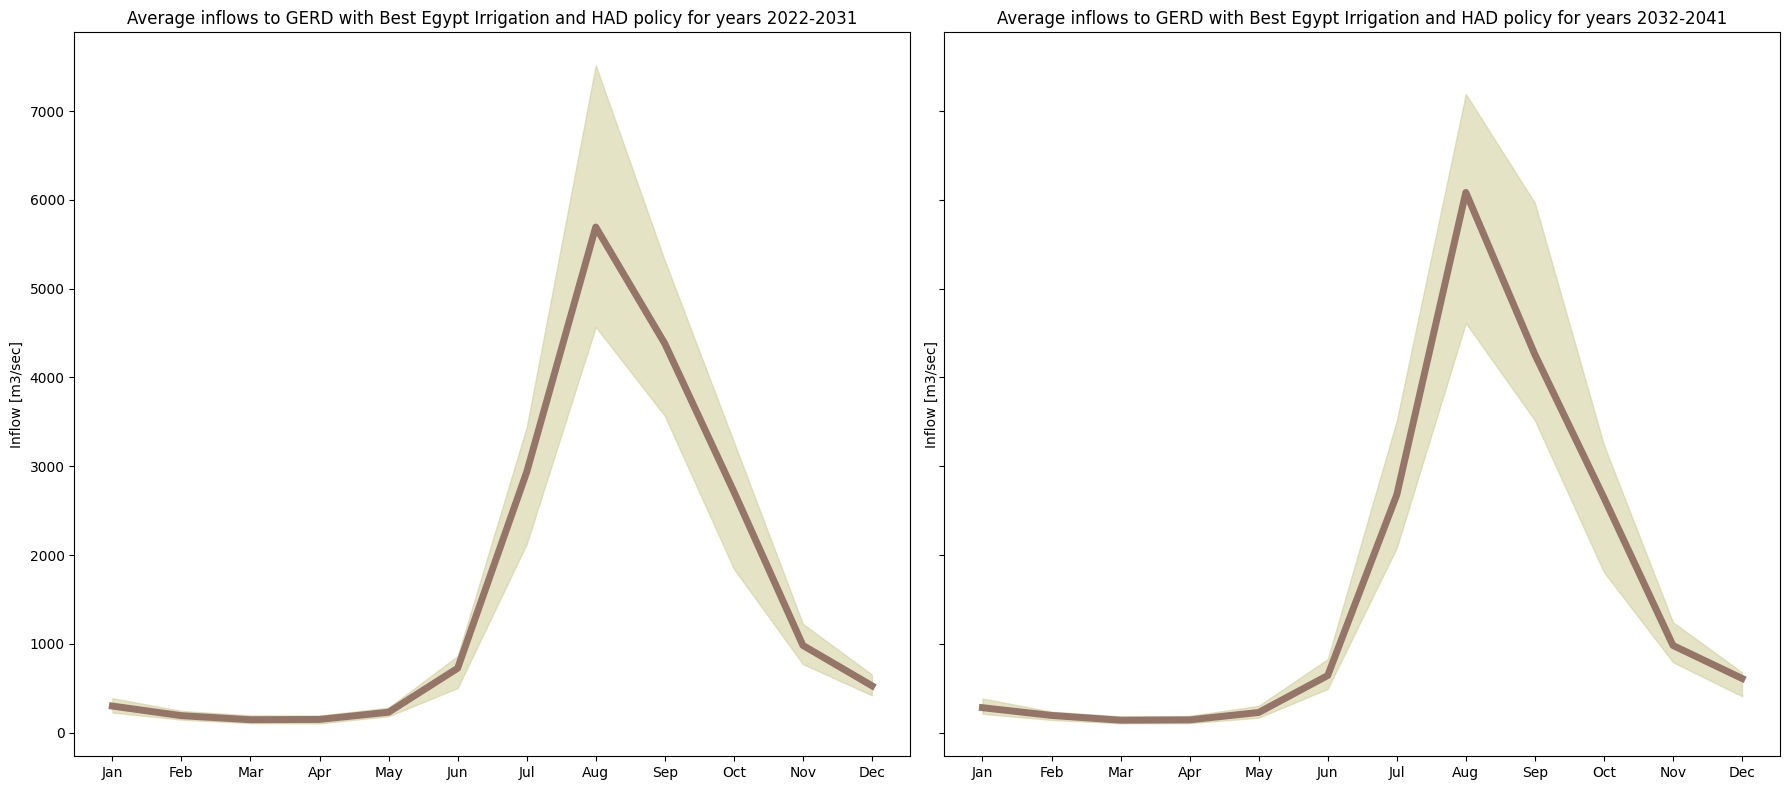

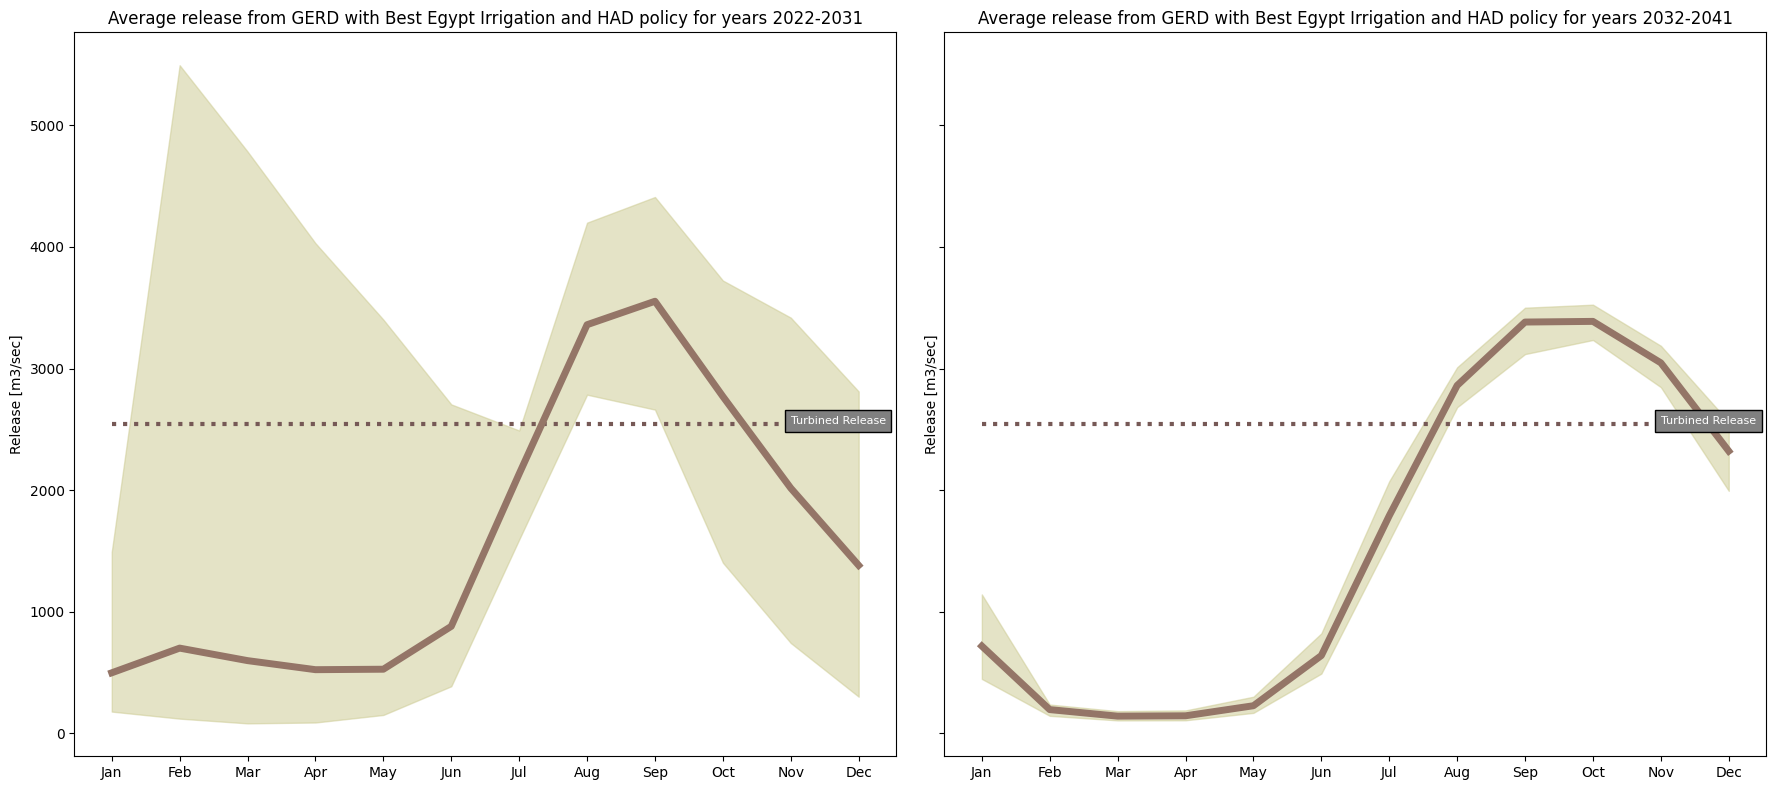

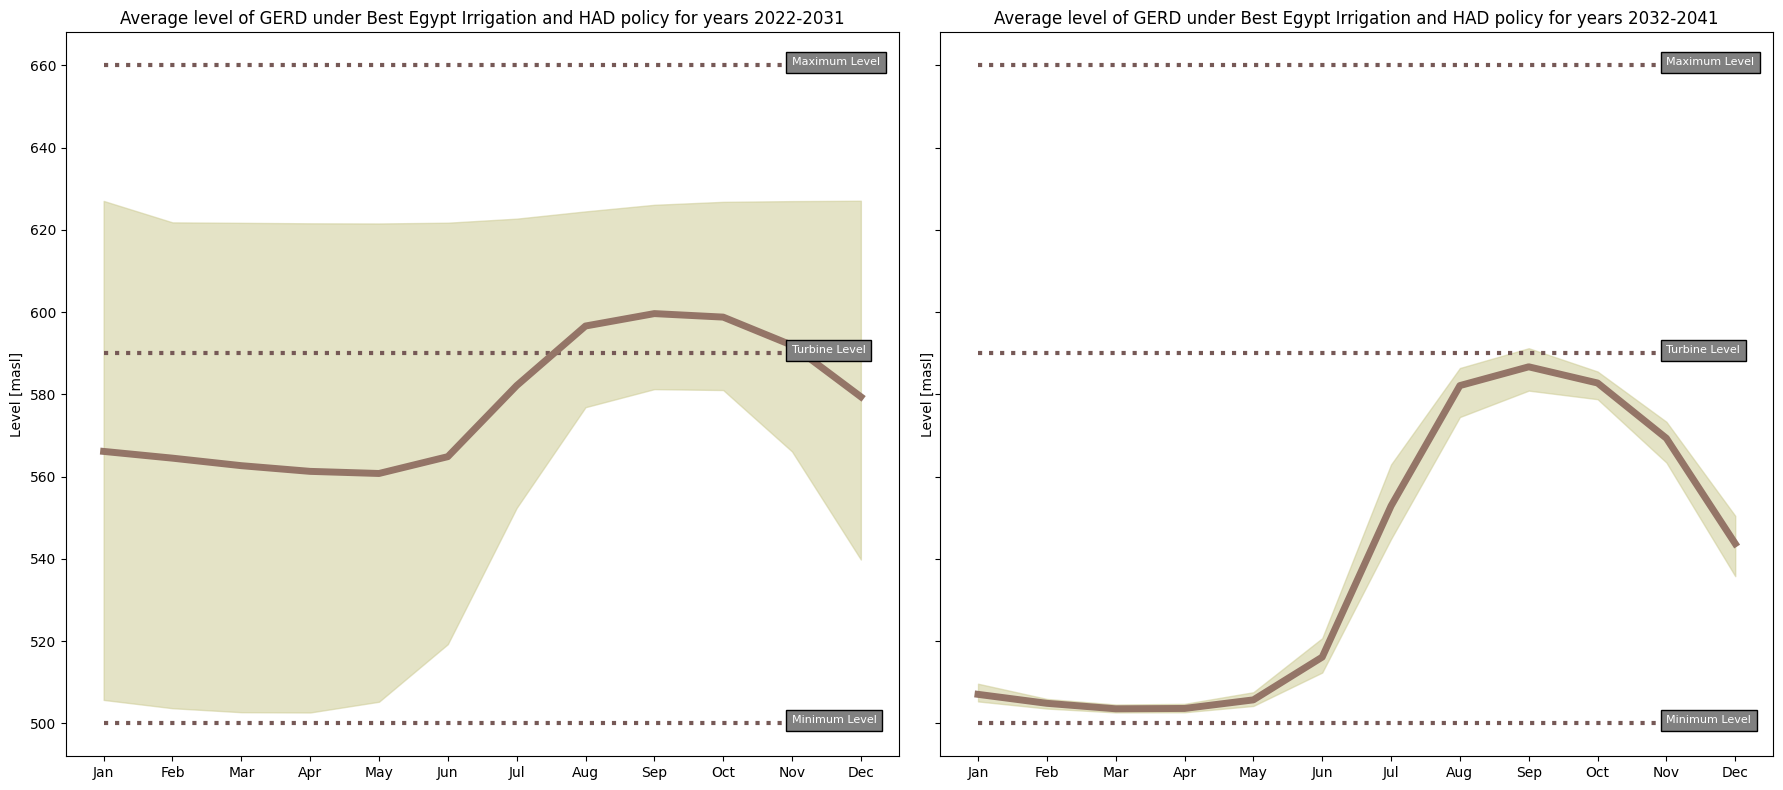

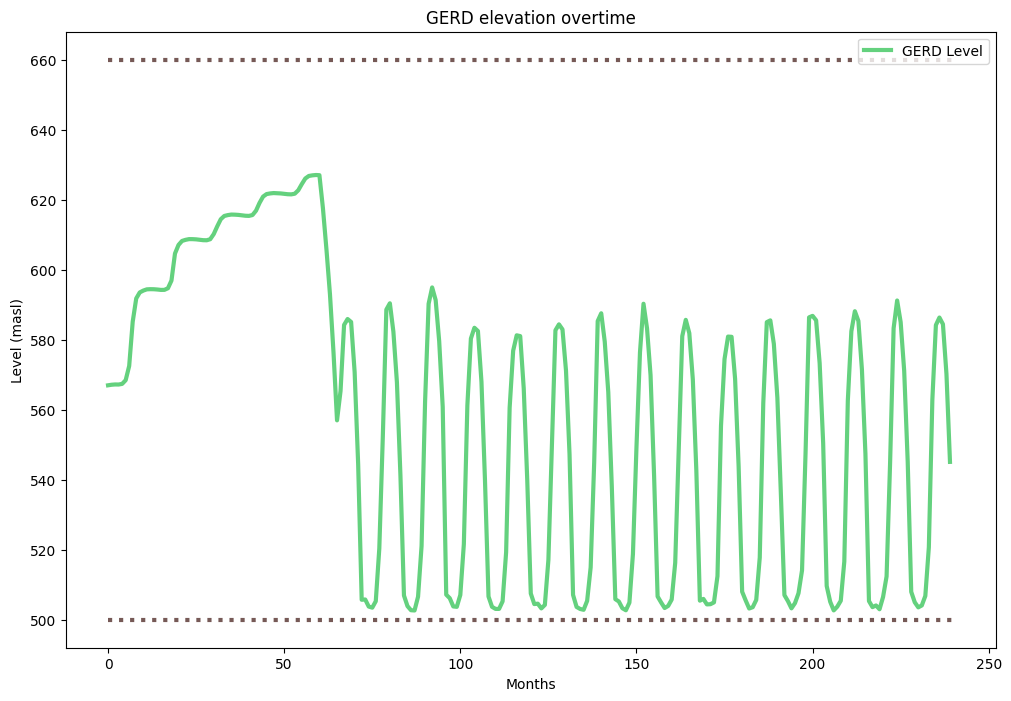

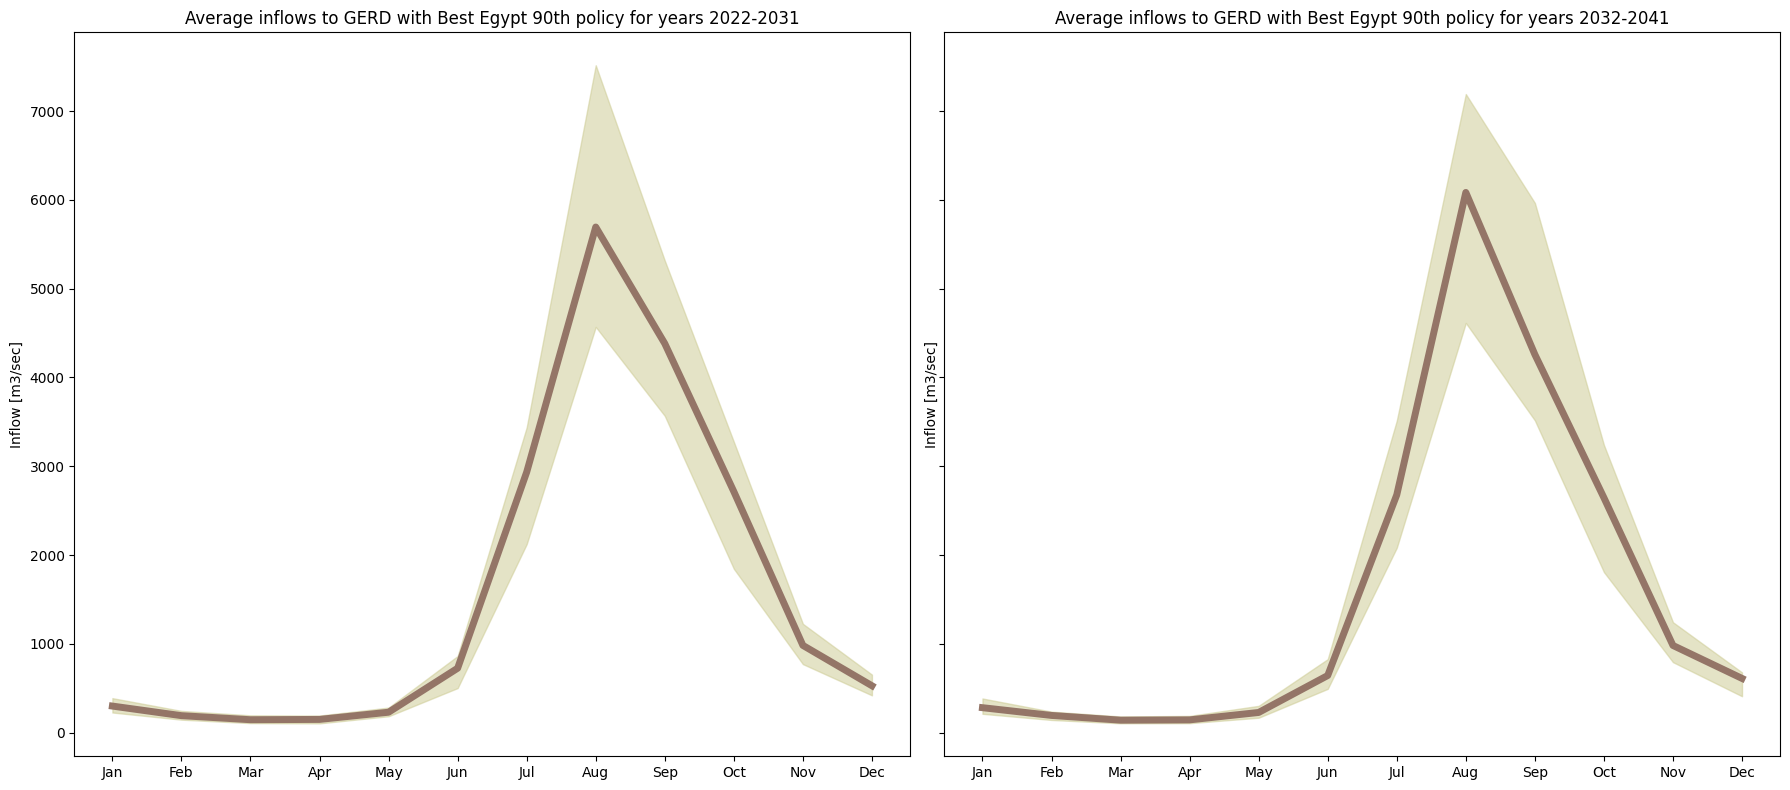

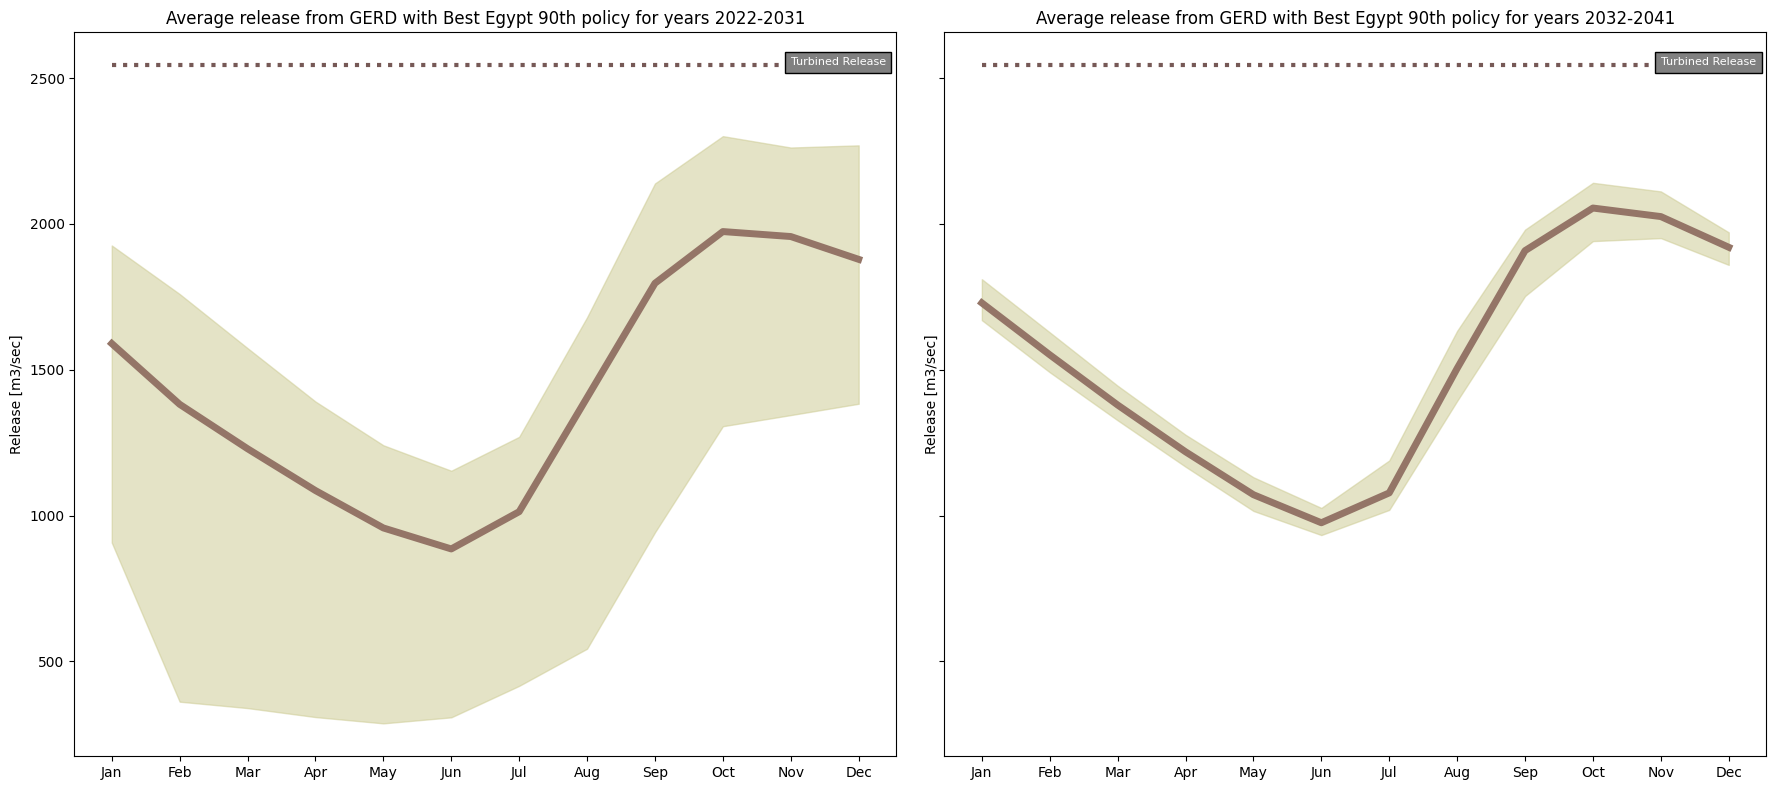

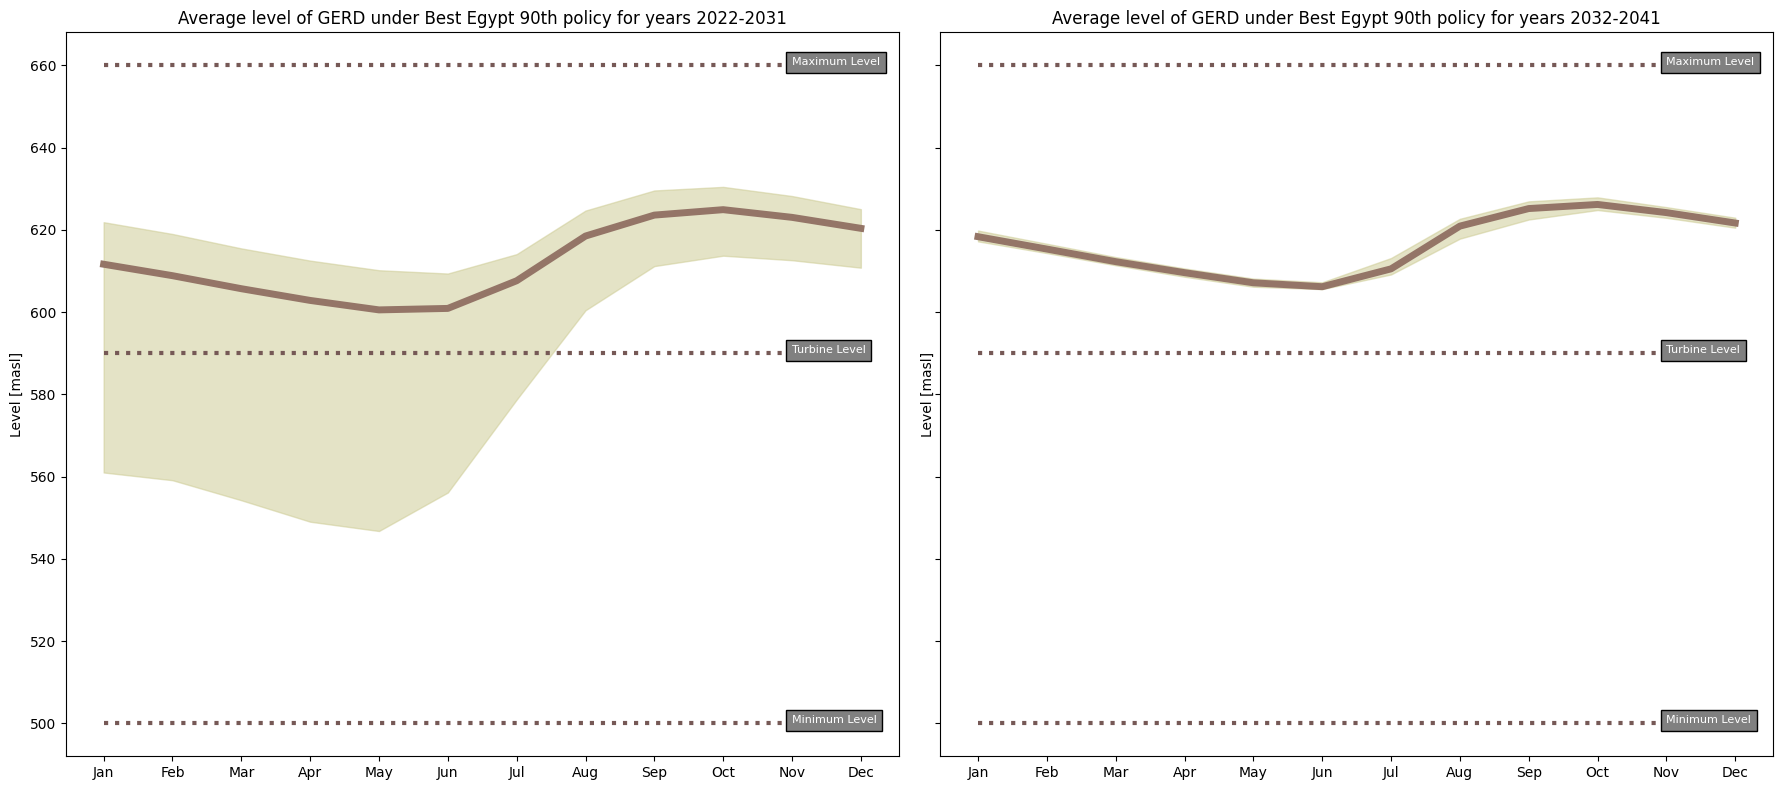

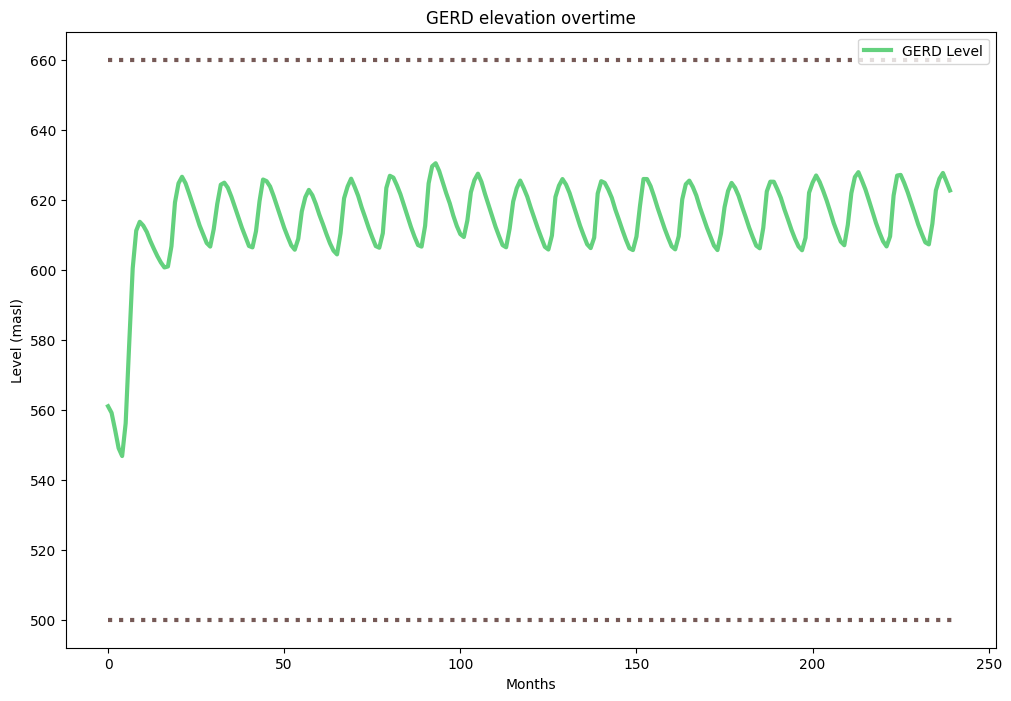

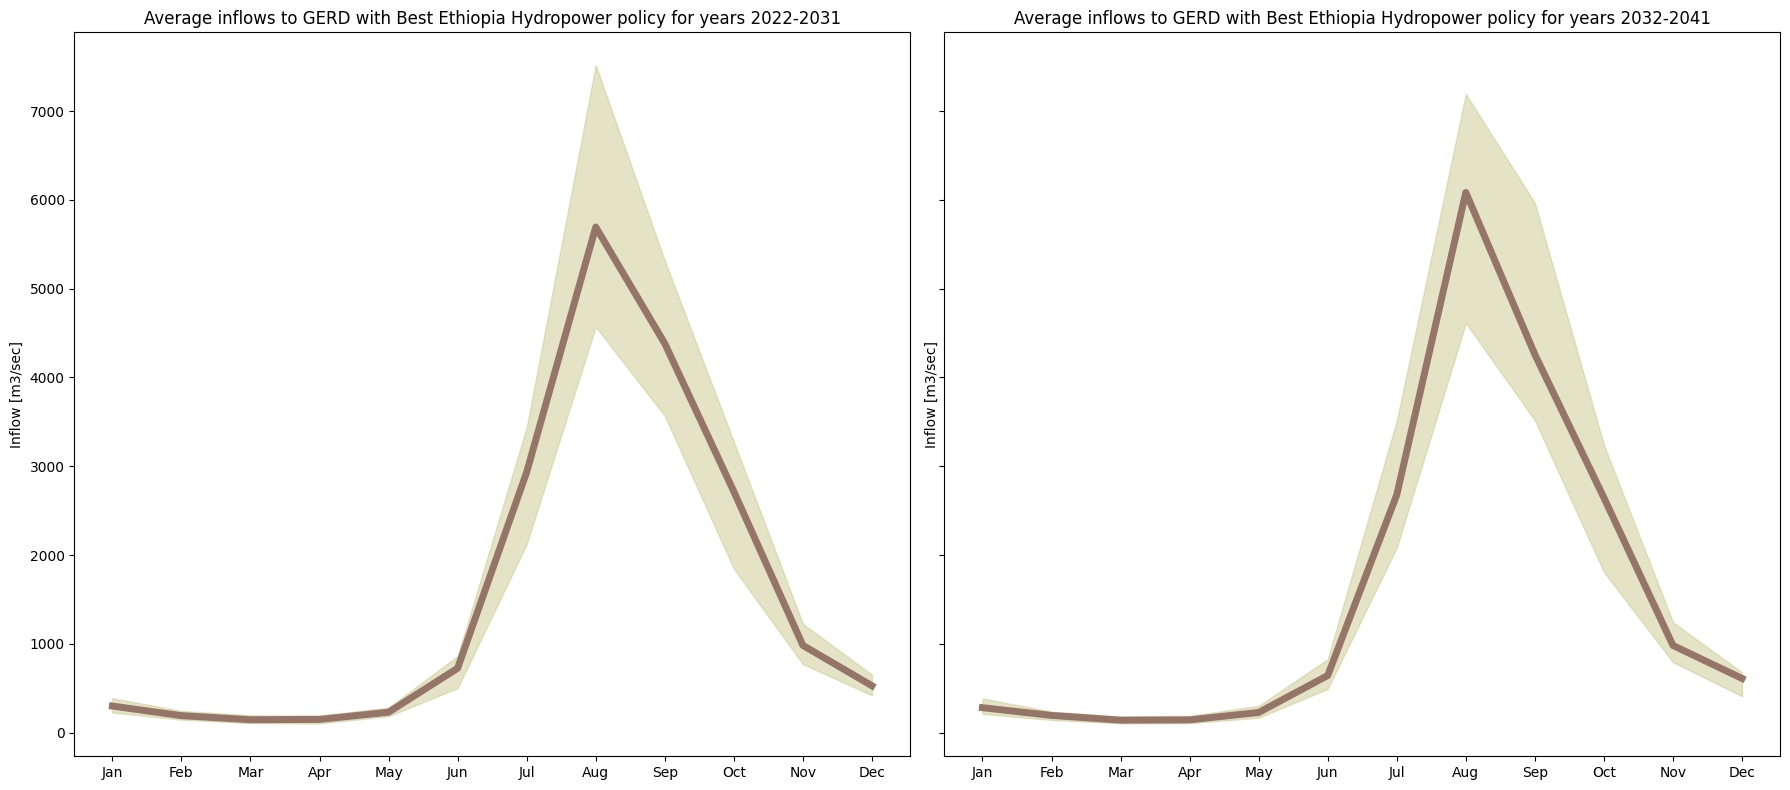

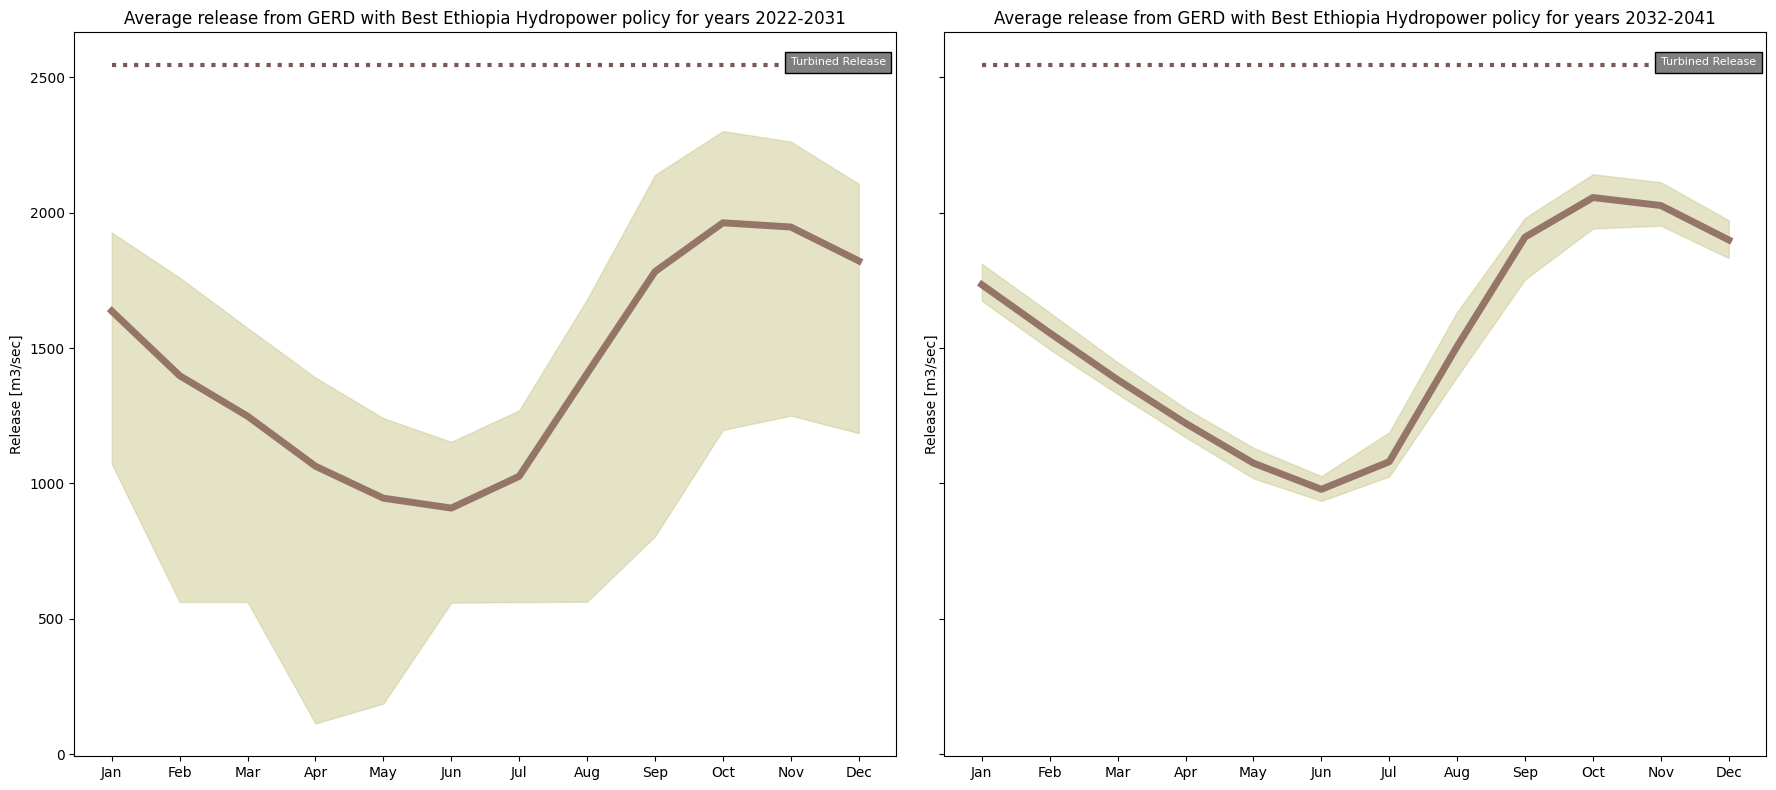

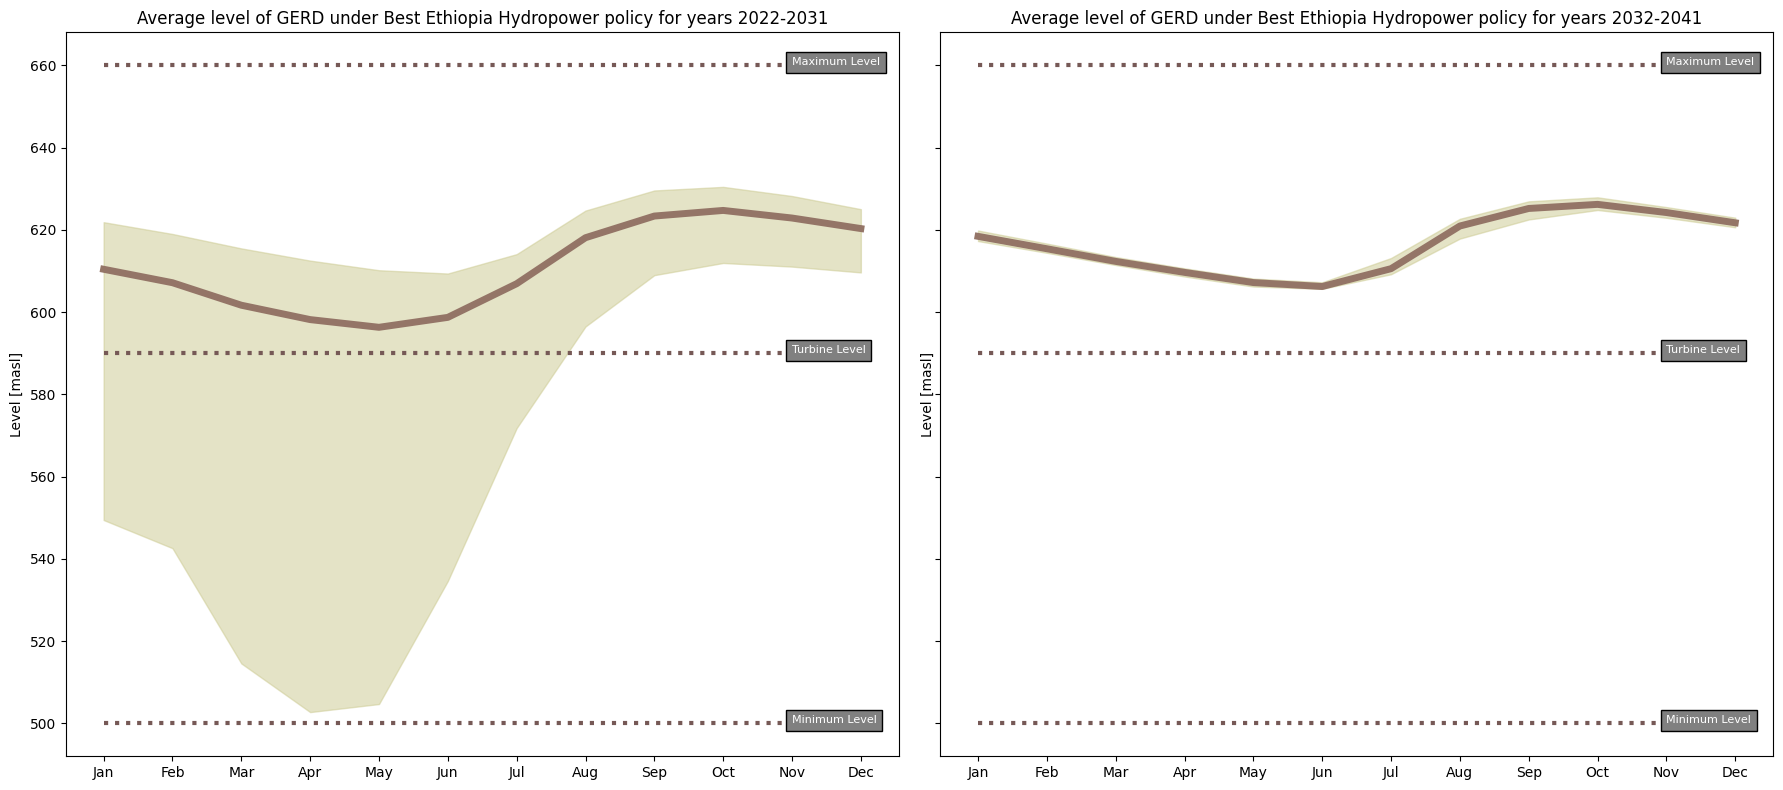

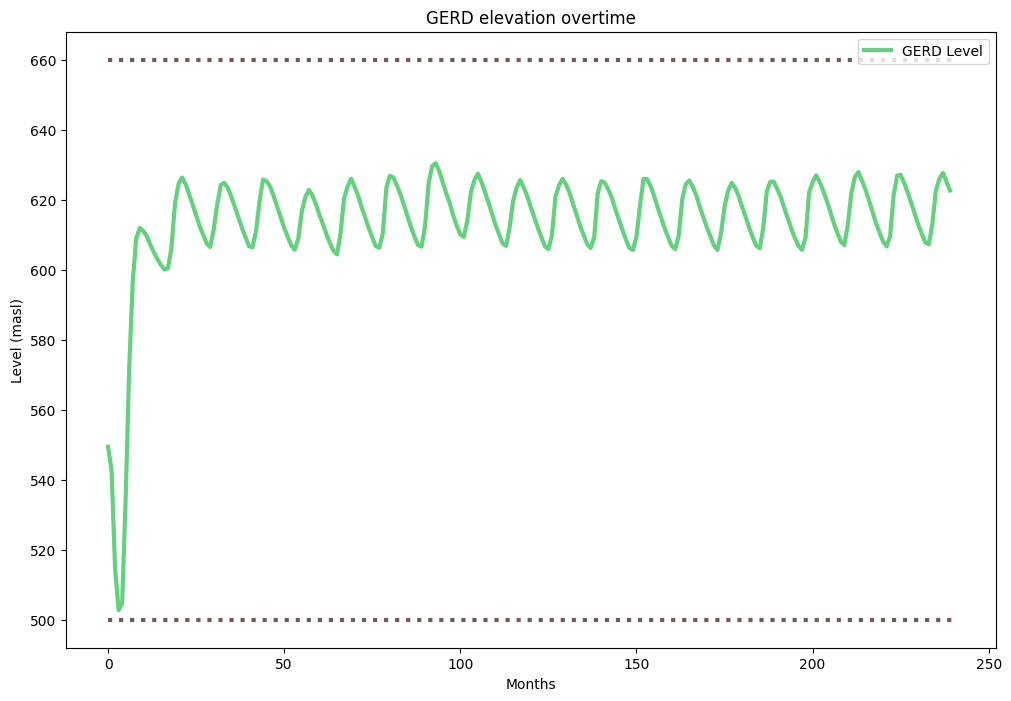

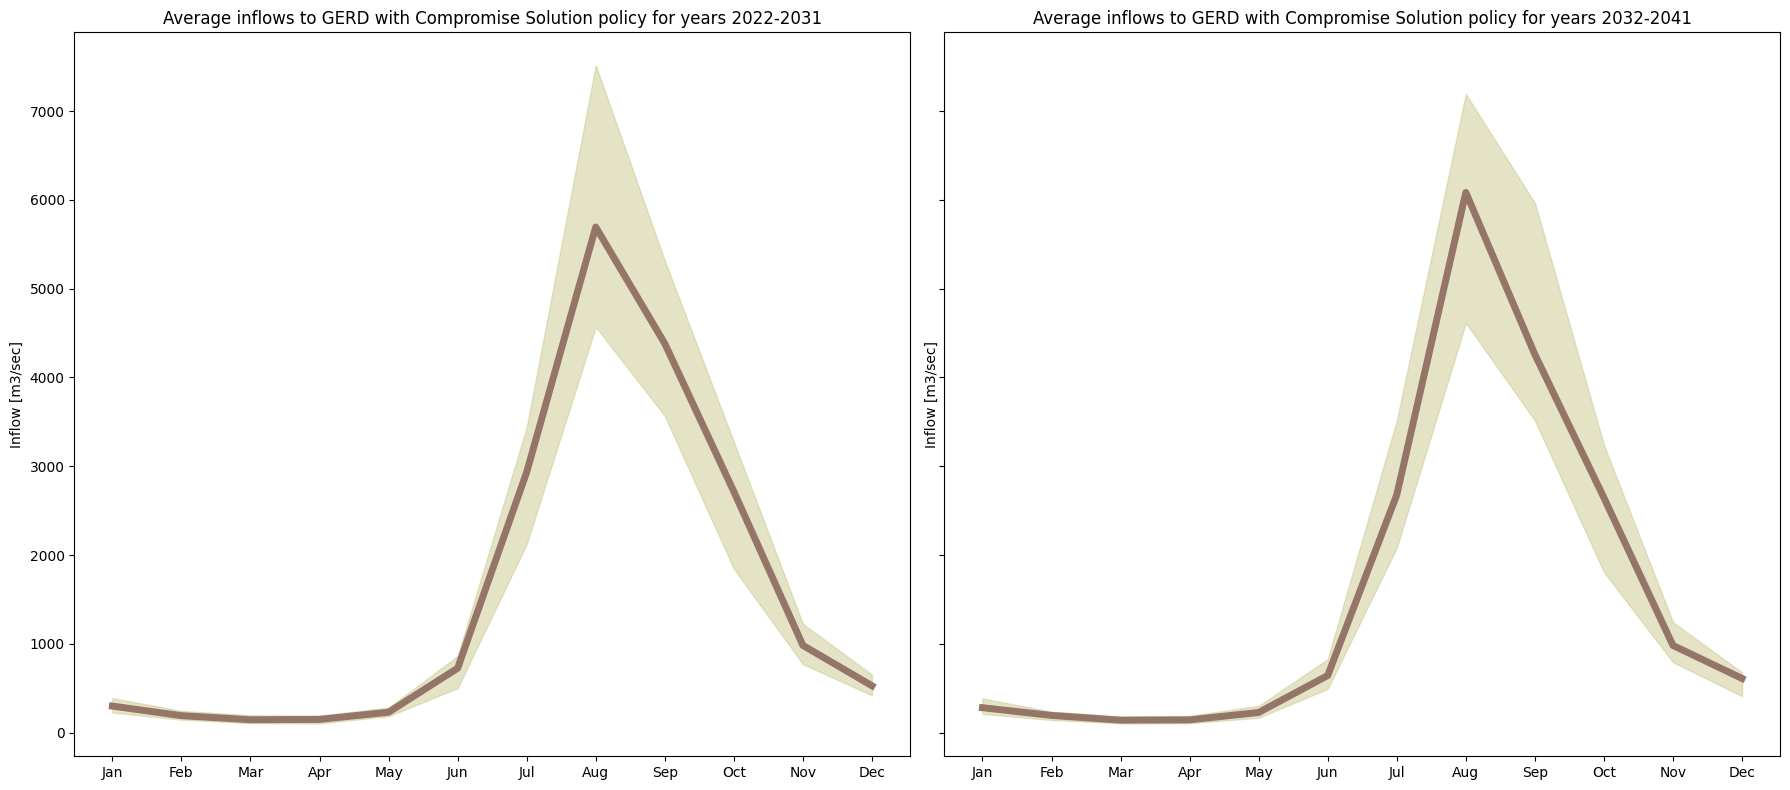

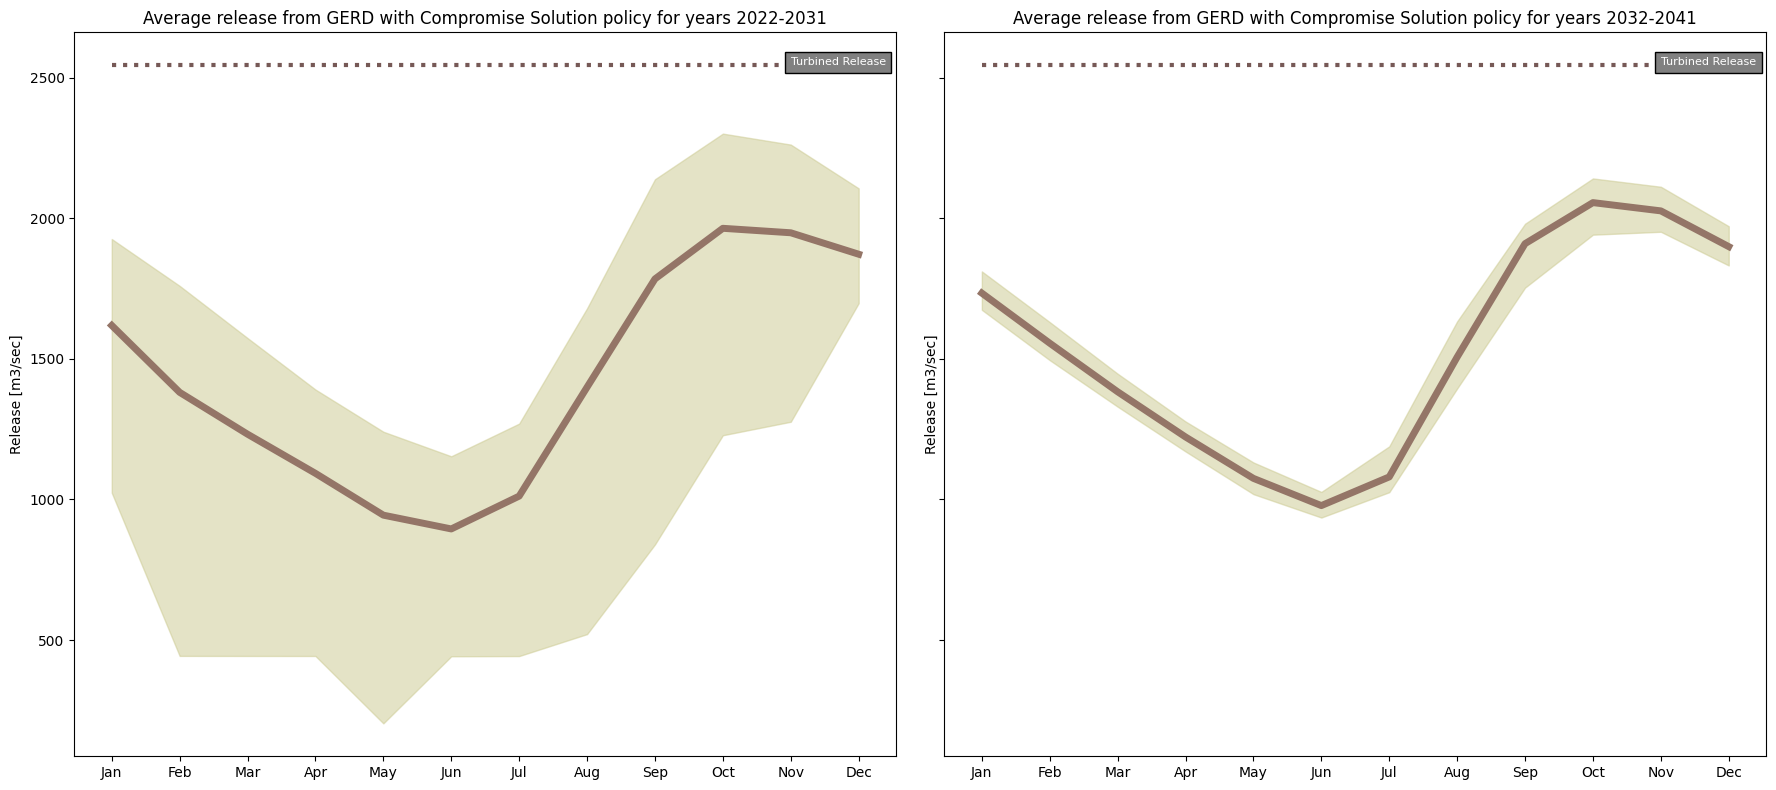

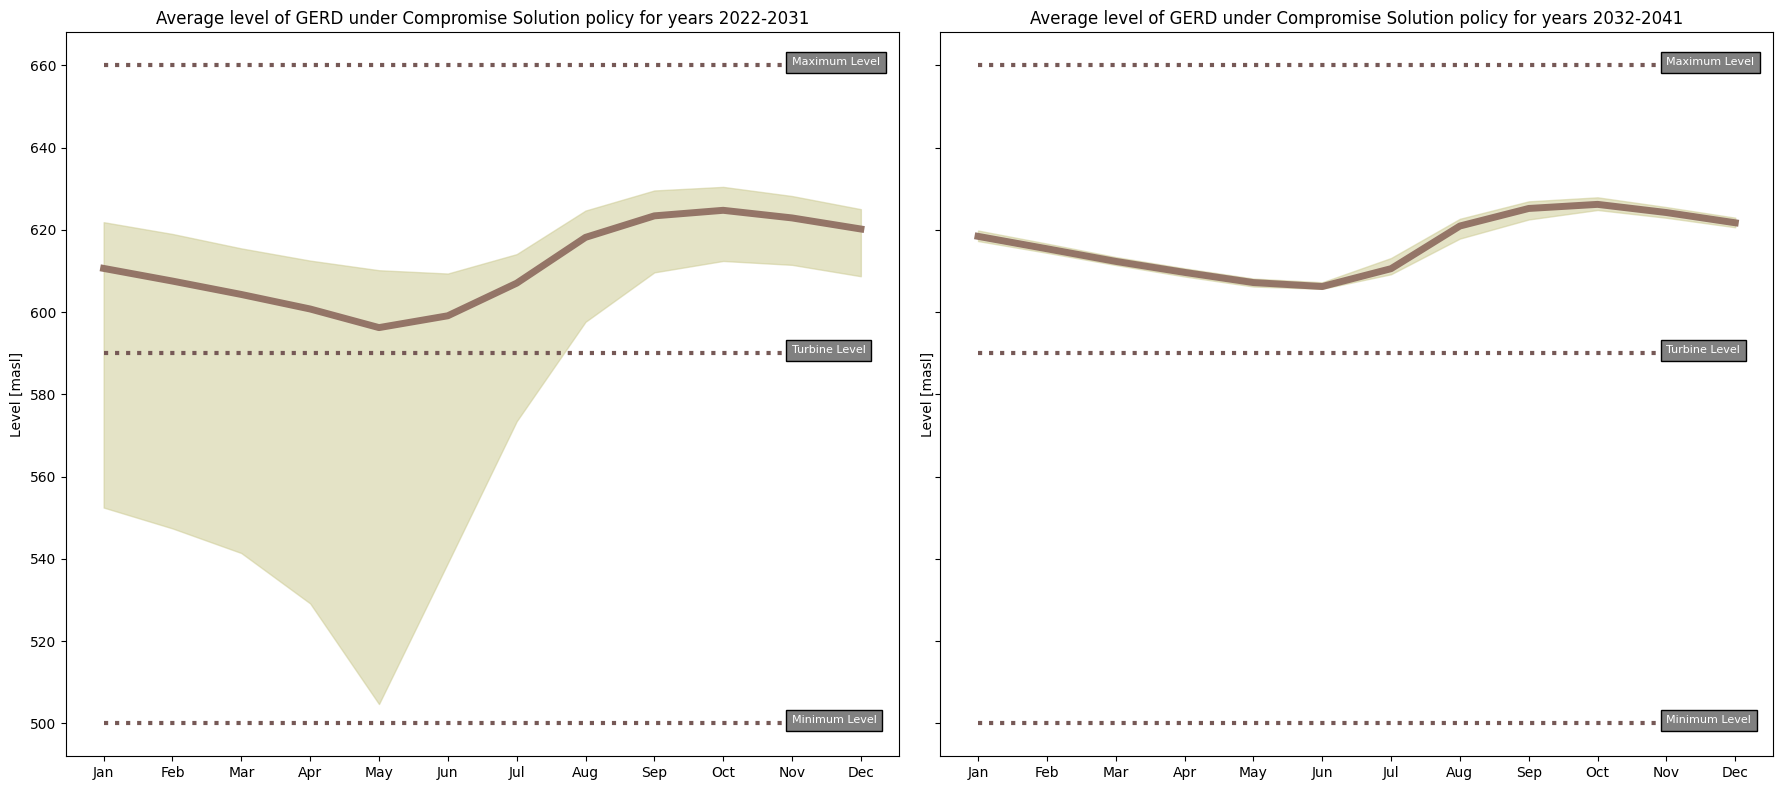

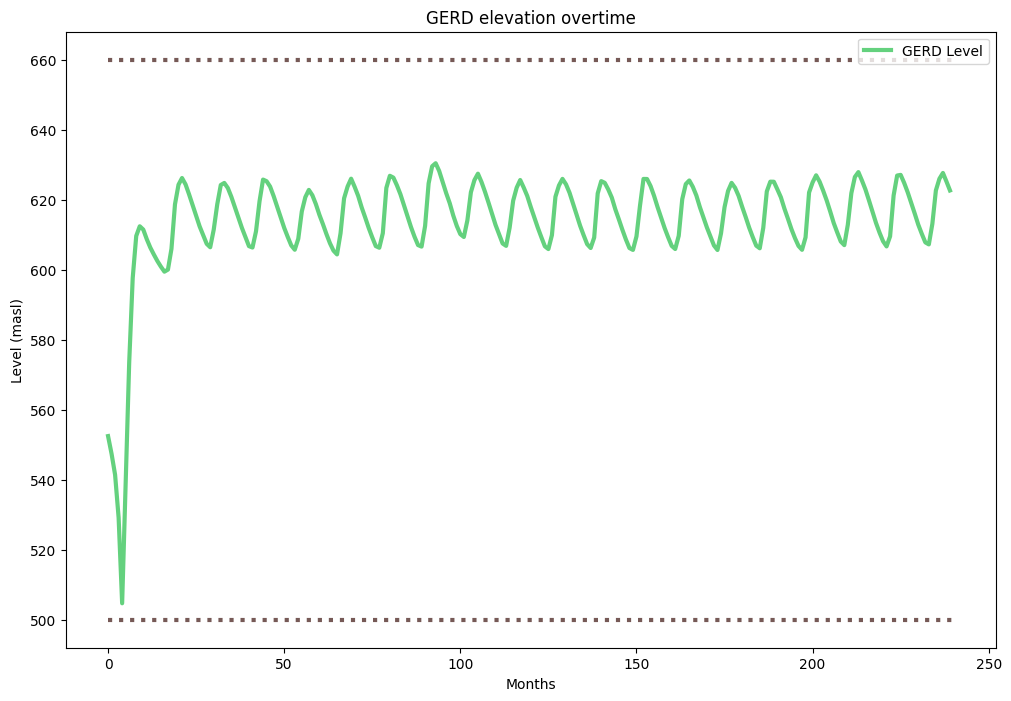

In [76]:

#nile_model = generate_input_data(nile_model, sim_horizon=20)
nile_model = generate_input_data(nile_model, sim_horizon=20)

for i, policy in enumerate(test_policies):
    
    nile_model.evaluate(policy)
    plotter = HydroModelPlotter(nile_model)
    plotter.plot_condensed_inflow_separated("GERD", policy_names[i])
    plotter.plot_condensed_release_separated("GERD", policy_names[i])
    plotter.plot_condensed_level_separated("GERD", policy_names[i])
    plotter.plot_level_with_limits("GERD")
    
    
    

In [20]:
nile_model = generate_input_data(nile_model, sim_horizon=20)
nile_model.evaluate(best_ethiopia_hydro)

(34722.98767698067,
 734.532300865978,
 0.5625,
 42.9301825962105,
 0.0,
 62273176.16284869)

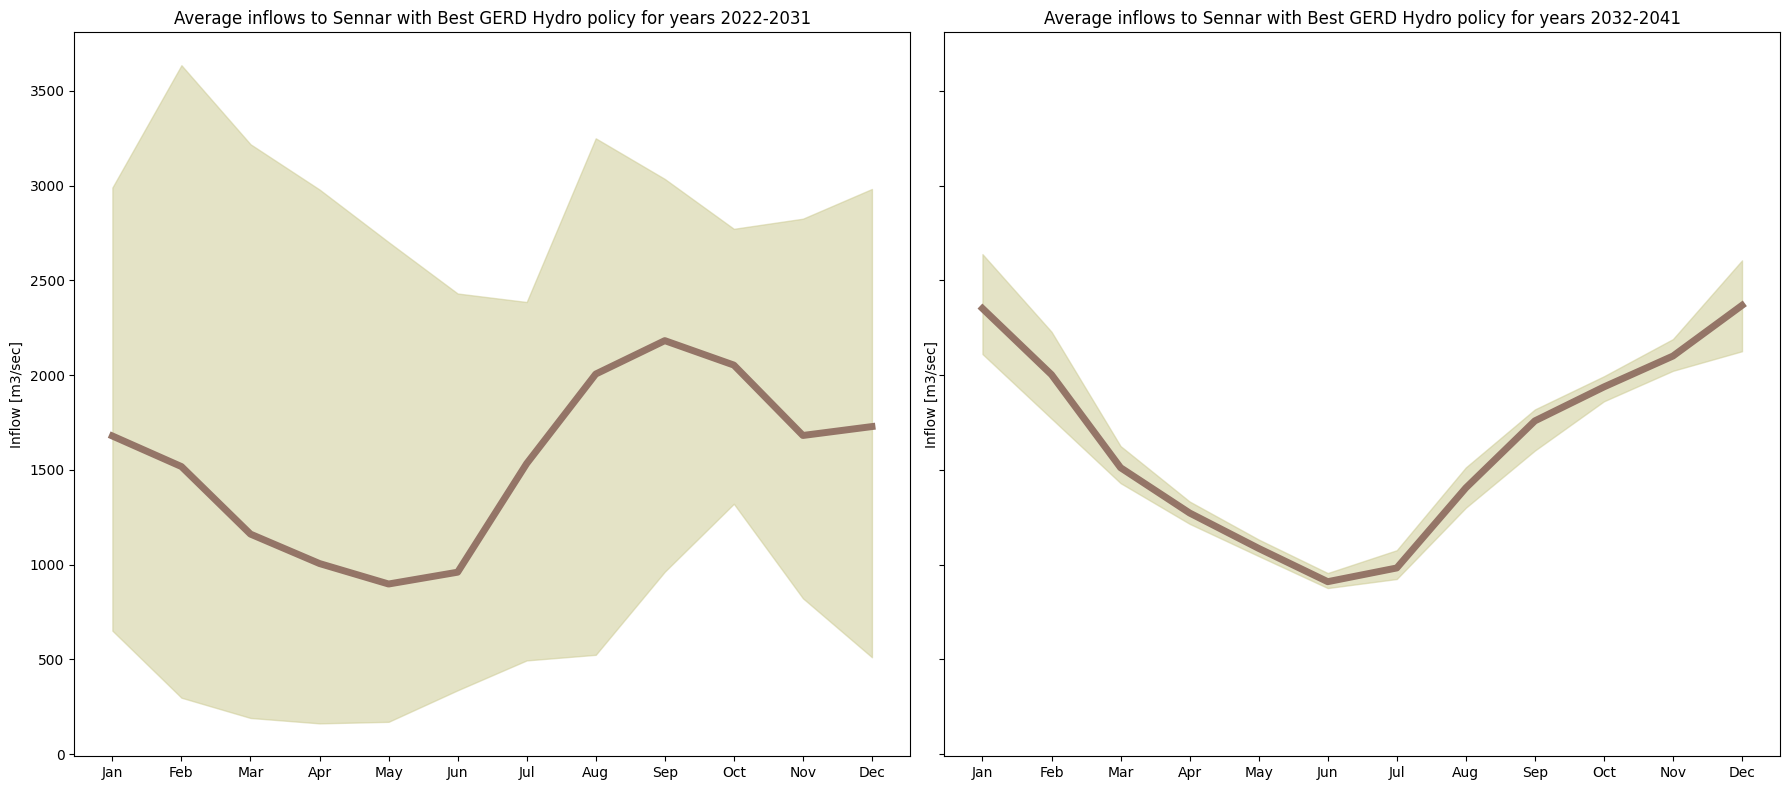

In [21]:
from plotter import HydroModelPlotter

plotter = HydroModelPlotter(nile_model)
plotter.plot_condensed_inflow_separated("Sennar", "Best GERD Hydro")

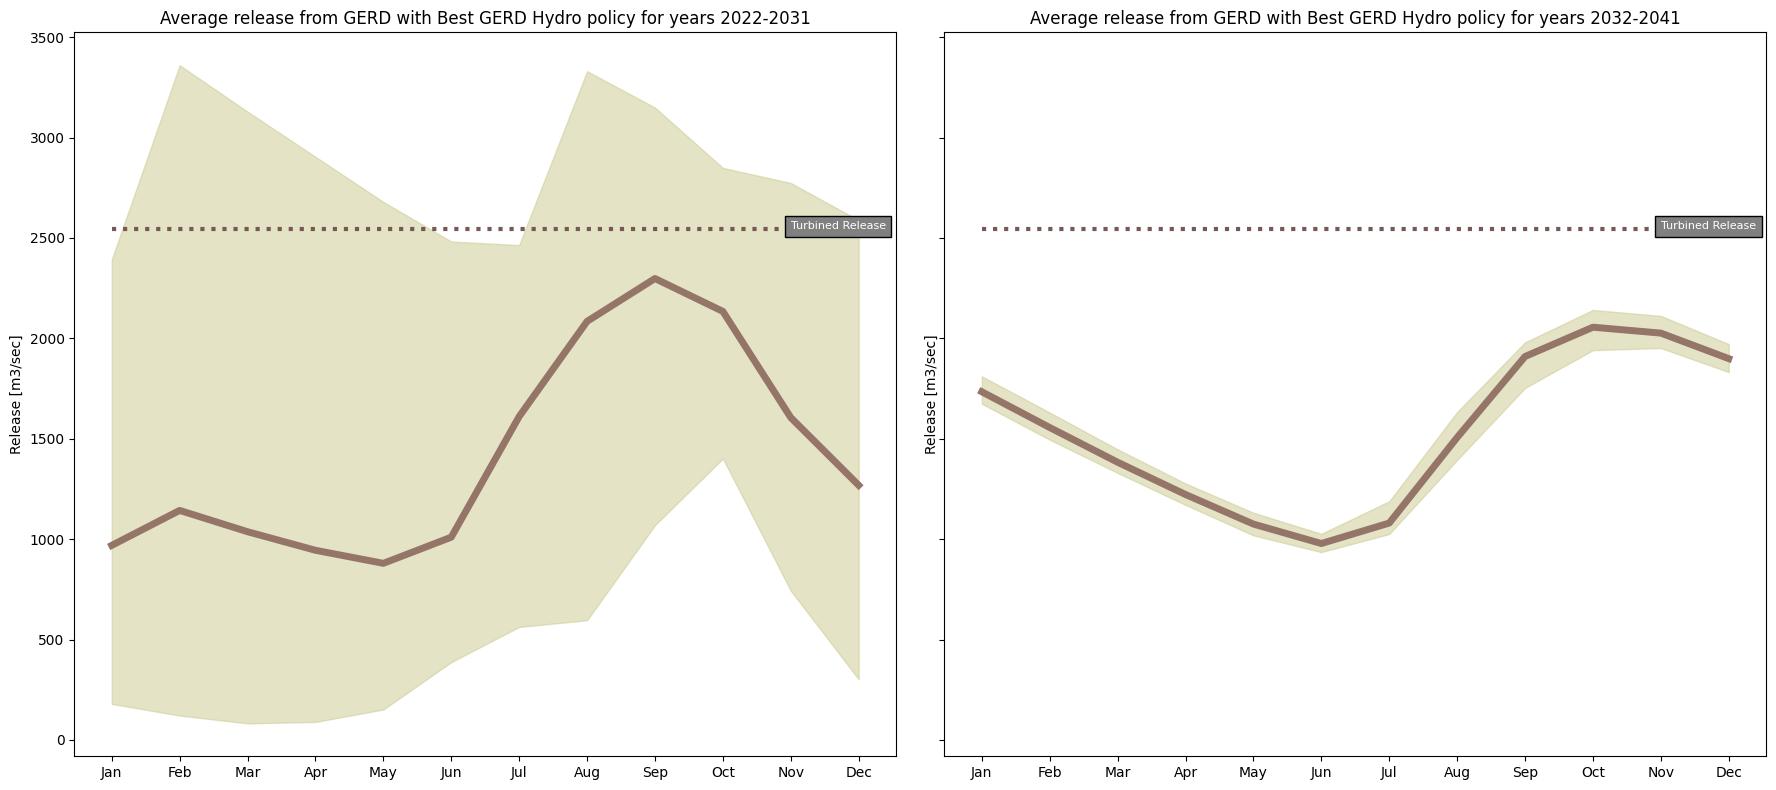

In [22]:
plotter.plot_condensed_release_separated("GERD", "Best GERD Hydro")

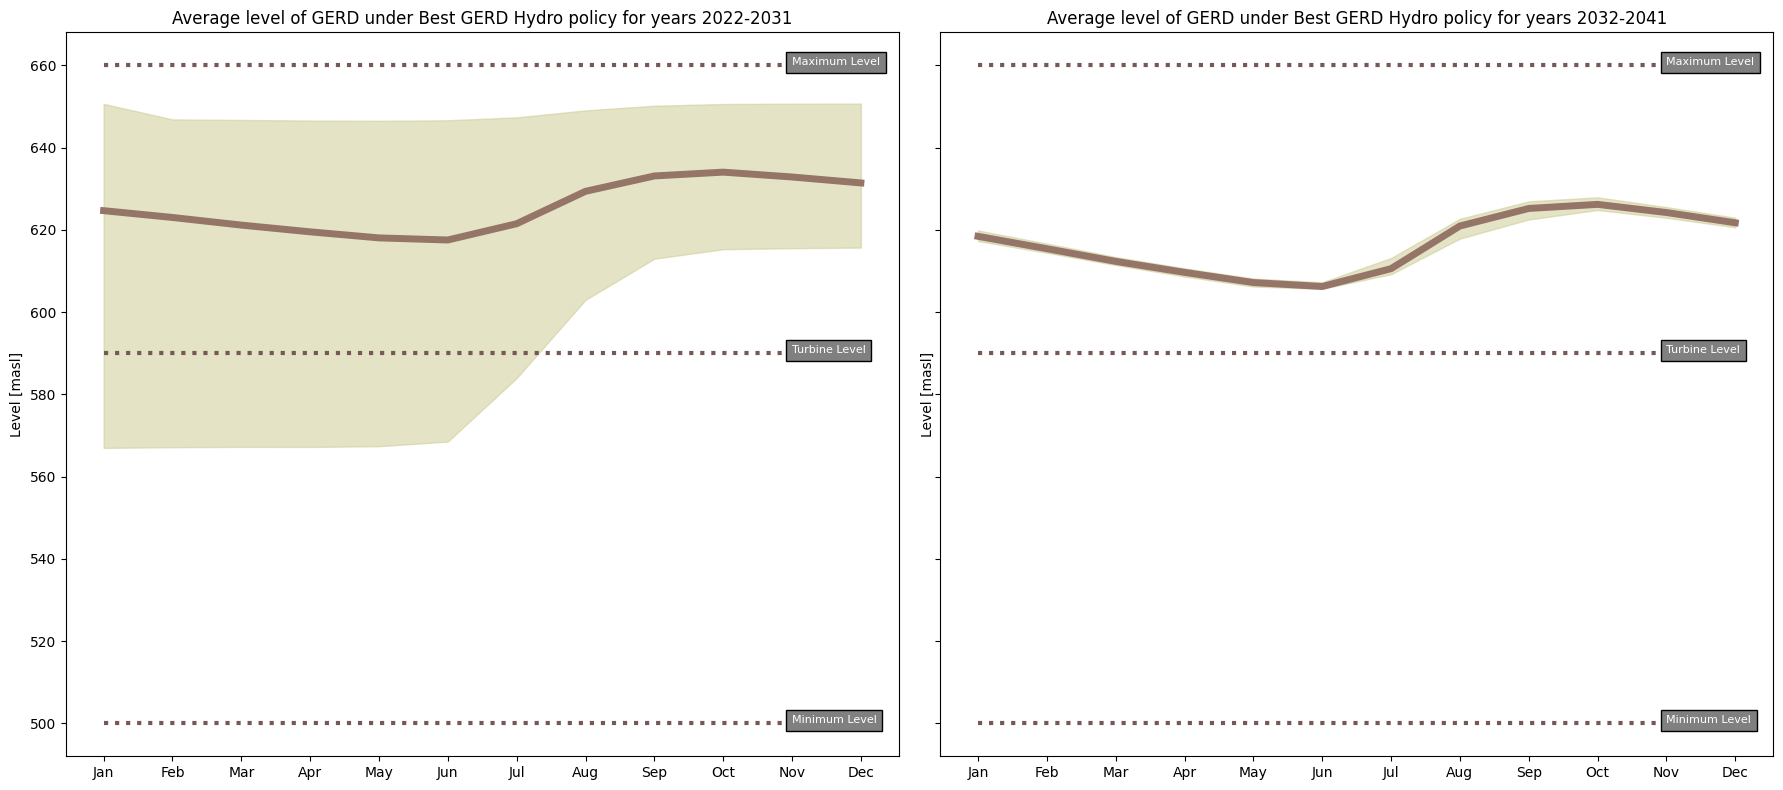

In [23]:
plotter.plot_condensed_level_separated("GERD", "Best GERD Hydro")

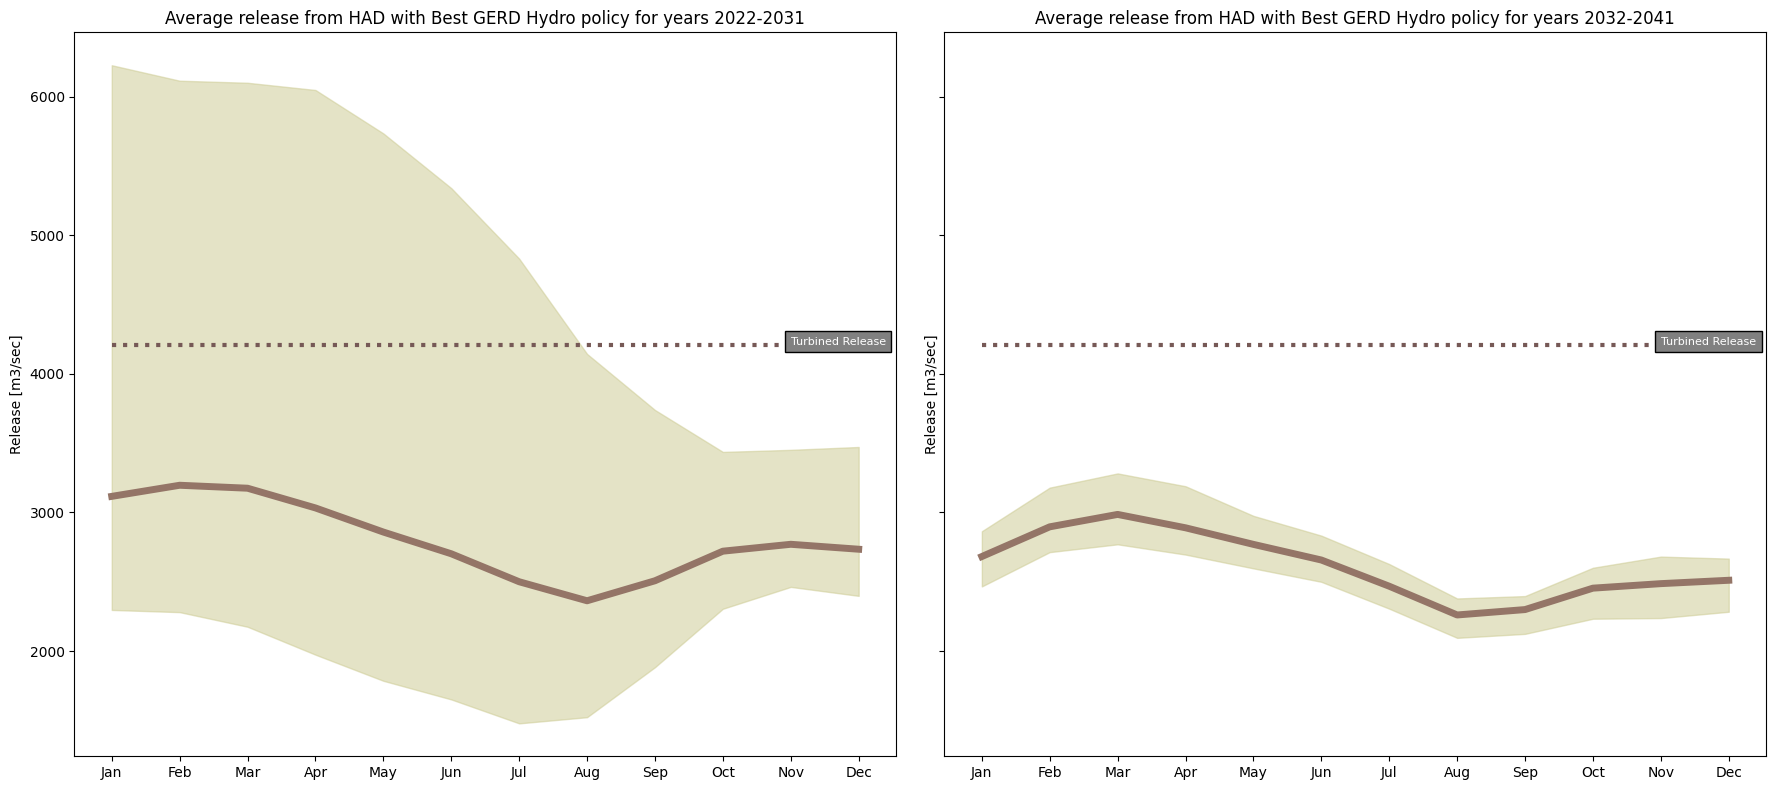

In [24]:
plotter.plot_condensed_release_separated("HAD", "Best GERD Hydro")

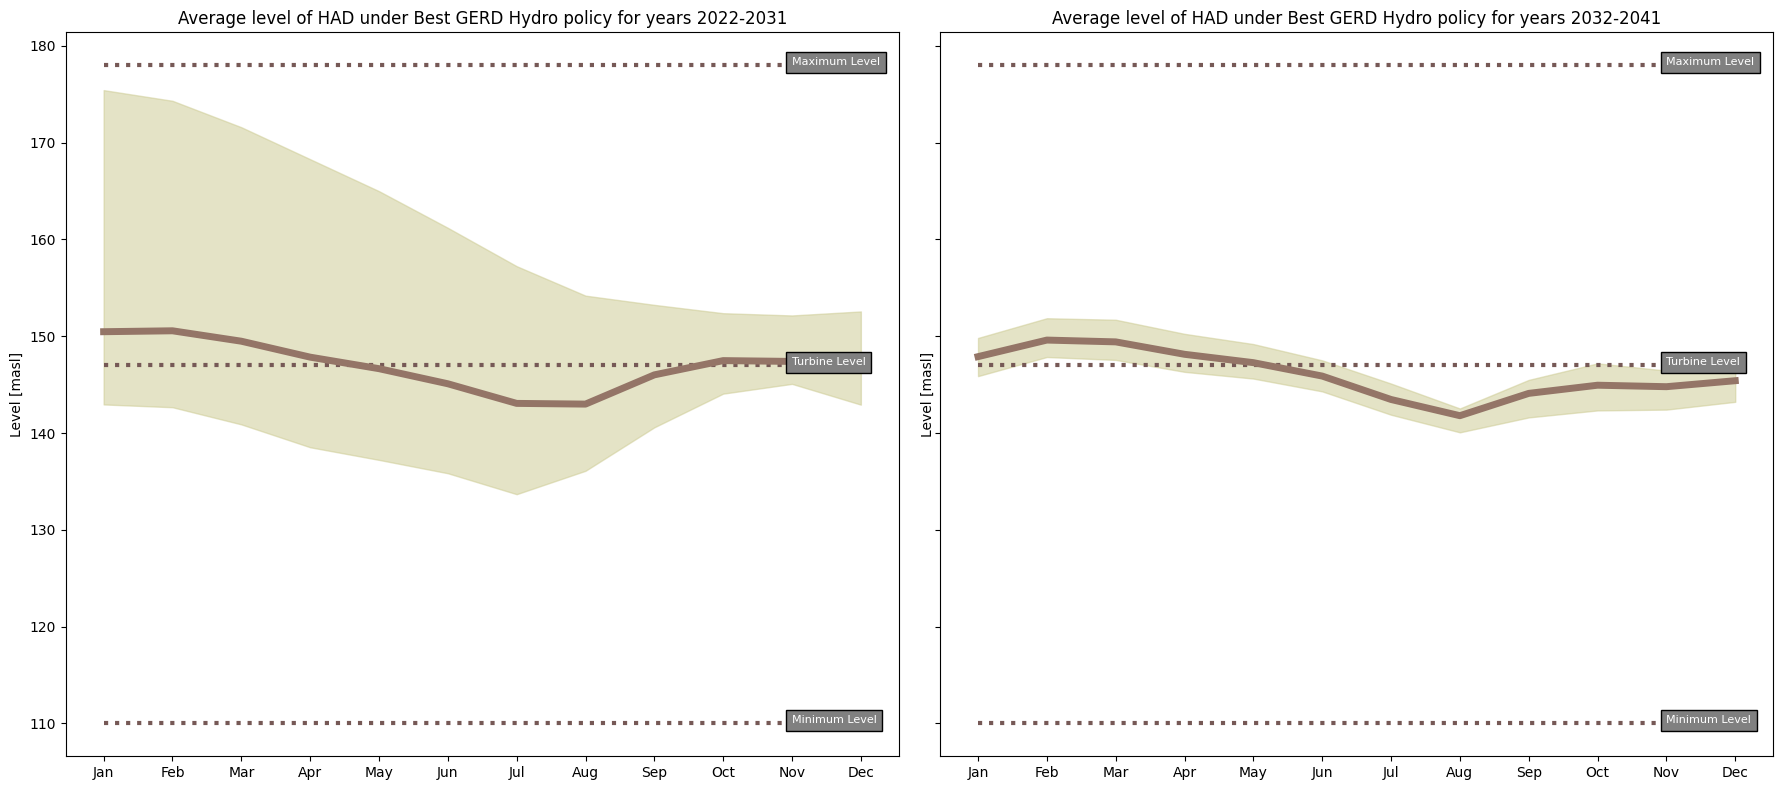

In [26]:
plotter.plot_condensed_level_separated("HAD", "Best GERD Hydro")

In [17]:
# test_policies = [best_egypt_irr_and_HAD, best_egypt_90, best_ethiopia_hydro]
# nile_model = generate_input_data(nile_model, sim_horizon=20)
# model_plotter = HydroModelPlotter(nile_model)

# for pol in test_policies:
#     nile_model.evaluate(pol)
#     model_plotter.plot_received_vs_demand_for_district("Egypt")
#     model_plotter.plot_received_vs_demand_for_district("Gezira")
    
#     for dam in nile_model.reservoir_names:
#         model_plotter.plot_level_with_limits(dam)
#         model_plotter.plot_levels_condensed(dam)
    

In [13]:
objectives

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro
0,32860.160621,532.574401,0.000000,42.930183,0.0,6.200764e+07
1,34722.987677,734.532301,0.562500,42.930183,0.0,6.227318e+07
2,31422.095961,652.042734,0.562500,43.255449,0.0,5.495098e+07
3,7609.454234,62.200044,0.000000,92.657943,0.0,1.255121e+05
4,18689.382578,340.888240,0.095833,0.033902,0.0,5.302814e+07
...,...,...,...,...,...,...
117,18141.428488,307.088646,0.162500,0.000000,0.0,5.304743e+07
118,17270.116463,241.682454,0.000000,0.000000,0.0,5.268096e+07
119,19805.577704,334.260212,0.016667,0.005124,0.0,5.303458e+07
120,20382.644973,353.531612,0.000000,0.006364,0.0,5.303422e+07


In [14]:
new_order = ['egypt_irr',
 'ethiopia_hydro',
 'egypt_90',
 'egypt_low_had',
 'sudan_irr',
 'sudan_90',
 'class']

norm_df_ordered = norm_df.copy().reindex(columns=new_order)
norm_df_ordered

NameError: name 'norm_df' is not defined

In [ ]:
fig, ax = plt.subplots()
parallel_coordinates(norm_df_ordered, "class", ax=ax)

plt.show()

In [16]:
desire_couples

[(34722.98767698067, 7609.454234369528),
 (734.532300865978, 7.984832505047962),
 (0.5625, 0.0),
 (115.54578021230064, 0.0),
 (0.0, 0.0),
 (125512.14400044372, 62273176.16284869)]

In [ ]:
norm_df.describe()

In [ ]:
norm_df["class"] = 1

In [ ]:
parallel_coordinates(norm_df, "class")

In [ ]:
def parallel_plots(objectives_df):
    file_name='Best_objectives'

    names=['Egypt_irr','Egypt90_irr','Egypt_low_HAD','Sudan_irr', 'Sudan90_irr','Ethiopia_hydro']
    units=['m3','m3','none','m3','m3','MwH']

    mx=[]
    mn=[]
    for column in names:
        mx.append(str(round(objectives_df[column].max(), 1)))
        mn.append(str(round(objectives_df[column].min(), 1)))

    objectives_df=(objectives_df.max()-objectives_df)/(objectives_df.max()-objectives_df.min())
    objectives_df['Name'] = "All Solutions"
    for column in names:
        objectives_df = objectives_df.append(objectives_df.loc[objectives_df[column] == 1,:], ignore_index=True)
        objectives_df.iloc[-1,-1] = "Best " + column

    fig = plt.figure()

    ax1 = fig.add_subplot(111)

    gray='#bdbdbd'
    purple='#7a0177'
    green='#41ab5d'
    blue='#1d91c0'
    yellow='#fdaa09'
    pink='#c51b7d'

    parallel_coordinates(objectives_df,'Name', color= [gray,purple,yellow,blue], linewidth=7, alpha=.8)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=4, mode="expand", borderaxespad=1.5, fontsize=18)
    
    i=0
    ax1.set_xticks(np.arange(3))


    ax1.set_xticklabels([mx[i]+'\n'+'\n'+names[i]+'\n'+units[i], mx[i+1]+'\n'+'\n'+names[i+1]+'\n'+units[i+1],mx[i+2]+'\n'+'\n'+names[i+2]+'\n'+units[i+2]], fontsize=18)
    ax2 = ax1.twiny()
    ax2.set_xticks(np.arange(3))
    ax2.set_xticklabels([mn[i], mn[i+1],mn[i+2]], fontsize=18)
    ax1.get_yaxis().set_visible([])
    plt.text(1.02, 0.5, 'Direction of Preference $\\rightarrow$', {'color': '#636363', 'fontsize': 20},
             horizontalalignment='left',
             verticalalignment='center',
             rotation=90,
             clip_on=False,
             transform=plt.gca().transAxes)

    fig.set_size_inches(17.5, 9)